# Importing Libraries

In [2]:
# Core Python & Numerics
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Linear & Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Support Vector Regression
from sklearn.svm import SVR

# Preprocessing & Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import TargetEncoder, CountEncoder

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Statistical Diagnostics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# SHAP Analysis
!pip install shap
import shap

# Loading Dataset

In [4]:
# Load gujarat file
guju = pd.read_csv('../Datasets/Gujarat.csv')  
guju.head()

,projectRegId,projectName,promoterName,projectType,promoterType,architect_name,eng_name,projectAddress,projectAddress2,pinCode,...,totalLandCost,avgEstimatedCost_AllProjects,totalCarpetArea_form3A,totalBuiltupArea_form3A,totalSquareFootBuild,AvgSquareFootBuild,avgCostPerSqFt,avgCostPerUnit,totalAreaOfLand,AvgAreaOfLand
0,7871,SURAT DIAMOND BOURSE,SDB DIAMOND BOURSE,Commercial,COMPANY,MORPHOGENESIS,JW CONSULTANTS LLP,"BLOCK NO.177, VILLAGE KHAJOD, TALUKA MAJURA",SURAT,394550.0,...,6.680442e+09,2.769942e+10,196471.066549,196471.066549,196471.07,196471.07,140984.730922,5.773118e+06,143825.4,143825.4
1,1109,GLOBALE TEXTILE MARKET,GLOBALE INFRASPACE LLP,Commercial,LIMITED LIABILITY PARTNERSHIP FIRM,NaN,NaN,GLOBALE TEXTILE MARKET,"UMARWADA, KADODARA ROAD, SURAT",395006.0,...,3.660000e+09,7.110000e+09,636192.000000,636192.000000,636192.00,636192.00,11175.871435,1.893980e+06,NaN,NaN
2,4258,68 SHOPS + 1228 LIG-2 + 432 MIG-1 AT GOTA,GUJARAT HOUSING BOARD,Mixed Development,COMPETENT AUTHORITY/ GOVERNMENT,MAMTA SHAH & ASSOCIATES,DELF CONSULTING ENGINEERS (INDIA) PVT. LTD.,VASANTNAGAR TOWNSHIP,"GOTA OGNAJ ROAD, GOTA",380060.0,...,2.308993e+06,2.045715e+09,174950.560000,336330.720000,174950.56,174950.56,11693.105144,5.919315e+05,NaN,NaN
3,5212,SHREE KUBERJI VALENTINE TEXTILE MARKET,SHREE KUBERJI BUILDCON,Commercial,PARTNERSHIP FIRM,NaN,NaN,"BLOCK NO:258-259,TP:35,SAROLI-KUMBHARIYA","OPP.BHARAT CANCER HOSPITAL,SURAT KADODARA ROAD",NaN,...,3.775819e+08,2.448422e+09,46423.440000,46423.440000,46423.44,46423.44,52741.069942,7.651318e+05,13277.3,13277.3
4,10965,Construction of EWS - I and EWS-II (2560 HOUS...,SURAT URBAN DEVELOPMENT AUTHORITY,Residential/Group Housing,COMPETENT AUTHORITY/ GOVERNMENT,KIRTI PATEL,KIRTI PATEL,TP SCHEME NO 30 AT VANAKLA,FINAL PLOT NUMBER 129,NaN,...,0.000000e+00,2.394000e+09,94350.080000,94350.080000,94350.08,94350.08,25373.587389,9.351562e+05,50756.0,50756.0


# Exploratory Data Analysis

## Top 10 Projects in terms of Total Estimated Cost

In [7]:
guju_des = guju.sort_values(by='totalEstimatedCost', ascending=False)
guju_des = guju_des[["projectName",
                 "projectType",
                 "promoterName",
                 "distName",
                 "EndProjectYear",
                 "totalEstimatedCost"]]
guju_des.head(10)

,projectName,projectType,promoterName,distName,EndProjectYear,totalEstimatedCost
0,SURAT DIAMOND BOURSE,Commercial,SDB DIAMOND BOURSE,Surat,2023.0,2.769942e+10
231,ANAMIKA HIGH POINT,Residential/Group Housing,CONSTERA REALTY PRIVATE LIMITED,Ahmedabad,2030.0,1.458392e+10
84,AVADH SELENIC,Residential/Group Housing,AVADH INFRASPACE LLP,Surat,2031.0,1.227070e+10
6,HAPPY BENCHMARK TEXTILE HUB,Commercial,HAPPY HOME CORPORATION,Surat,2024.0,1.192496e+10
242,SOBHA ELYSIA,Residential/Group Housing,SOBHA LIMITED,Gandhinagar,2030.0,1.152594e+10
13,AGORA CITY CENTER,Mixed Development,MANAV INFRASTRUCTURE PRIVATE LIMITED,Vadodara,2023.0,1.077939e+10
1032,AVADH MENORCA,Residential/Group Housing,AVADH BUILDCRAFT LLP,Surat,2029.0,7.764514e+09
2883,AVADH CLASSIMA,Residential/Group Housing,AVADH CLASSIMA,NaN,NaN,7.568074e+09
1,GLOBALE TEXTILE MARKET,Commercial,GLOBALE INFRASPACE LLP,Surat,2019.0,7.110000e+09
4822,IKEBANA,Residential/Group Housing,NEMI LANDMARKS PRIVATE LIMITED,NaN,NaN,7.026671e+09


## Categorical Data Preparation

In [9]:
guju1 = guju.copy()

In [10]:
# Clean promoterType values
guju1=guju.copy()
guju1['promoterType'] = guju1['promoterType'].replace({
    'PARTNERSHIP FIRM': 'Partnership Firm',
    'Partnership Firm': 'Partnership Firm',
    'LIMITED LIABILITY PARTNERSHIP FIRM': 'LLP',
    'Individual/Propritorship': 'Sole Proprietorship',
    'COMPANY': 'Company',
    'COMPETENT AUTHORITY/ GOVERNMENT': 'Government Body',
    'BOI': 'Other',
    'AOP': 'Other',
    'HUF': 'Other',
    'TRUST': 'Other'
})


# Check unique values after cleaning
print(sorted(guju1['promoterType'].dropna().unique()))

['Company', 'Government Body', 'LLP', 'Other', 'Partnership Firm', 'Sole Proprietorship']


In [11]:
# Clean distname values
guju1['distName'] = guju1['distName'].replace({
    'Sabar\xa0Kantha': 'Sabarkantha',
    'Chhota Udepur': 'Chhota Udaipur',
    'Chhota udepur': 'Chhota Udaipur',
    'AHmedabad': 'Ahmedabad',  
    'VADODARA': 'Vadodara',
    'RAJKOT': 'Rajkot',
    'SURAT': 'Surat'
})

# Check unique values after cleaning
print(sorted(guju1['distName'].dropna().unique()))

['Ahmedabad', 'Amreli', 'Anand', 'Aravalli', 'Banaskantha', 'Bharuch', 'Bhavnagar', 'Chhota Udaipur', 'Dahod', 'Gandhinagar', 'Gir Somnath', 'Jamnagar', 'Junagadh', 'Kheda', 'Kutch', 'Mahisagar', 'Mehsana', 'Morbi', 'Navsari', 'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha', 'Surat', 'Surendranagar', 'Tapi', 'Vadodara', 'Valsad']


## totalEstimatedCost on projectType

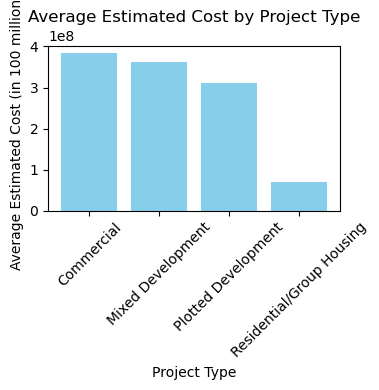

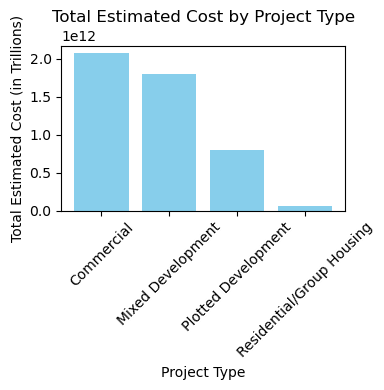

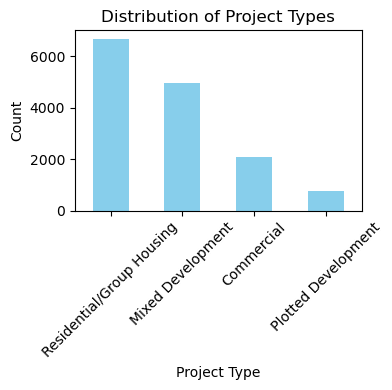

In [13]:
# Ensure columns are clean and numeric
guju1['totalEstimatedCost'] = pd.to_numeric(guju1['totalEstimatedCost'], errors='coerce')

# Drop missing project types if any
guju1_filtered = guju1.dropna(subset=['projectType', 'totalEstimatedCost'])

# Group by projectType
cost_by_type = guju1_filtered.groupby('projectType')['totalEstimatedCost'].agg(['mean', 'sum']).reset_index()

# Bar chart: Average Estimated Cost
plt.figure(figsize=(4, 4))
plt.bar(cost_by_type['projectType'], cost_by_type['mean'].sort_values(ascending=False), color='skyblue')
plt.title('Average Estimated Cost by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Average Estimated Cost (in 100 millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Total Estimated Cost
plt.figure(figsize=(4, 4))
plt.bar(cost_by_type['projectType'], cost_by_type['sum'].sort_values(ascending=False), color='skyblue')
plt.title('Total Estimated Cost by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Total Estimated Cost (in Trillions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Project Count
plt.figure(figsize=(4, 4))
guju1['projectType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Project Types')
plt.xlabel('Project Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## totalEstimatedCost on promoterType

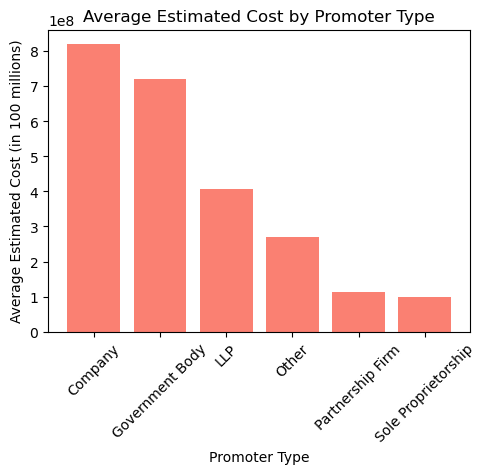

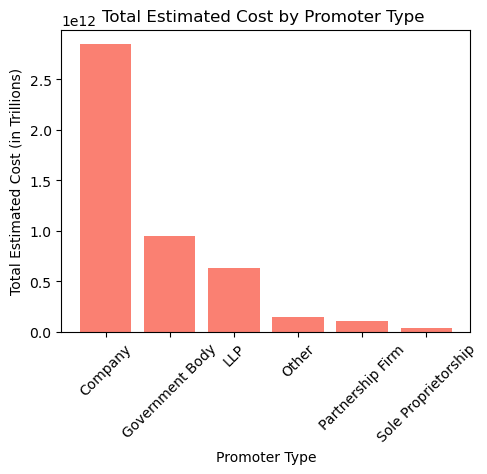

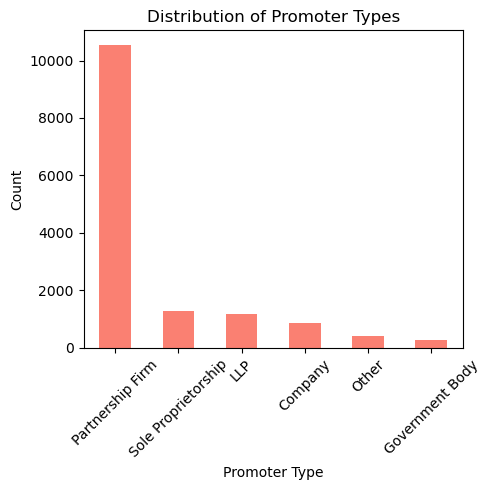

In [15]:
# Clean numeric column
guju1['totalEstimatedCost'] = pd.to_numeric(guju1['totalEstimatedCost'], errors='coerce')

# Drop missing promoter types
guju1_filtered = guju1.dropna(subset=['promoterType', 'totalEstimatedCost'])

# Group by promoterType
cost_by_promoter = guju1_filtered.groupby('promoterType')['totalEstimatedCost'].agg(['mean', 'sum']).reset_index()

# Bar chart: Average Estimated Cost
plt.figure(figsize=(5, 5))
plt.bar(cost_by_promoter['promoterType'], cost_by_promoter['mean'].sort_values(ascending=False), color='salmon')
plt.title('Average Estimated Cost by Promoter Type')
plt.xlabel('Promoter Type')
plt.ylabel('Average Estimated Cost (in 100 millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Total Estimated Cost
plt.figure(figsize=(5, 5))
plt.bar(cost_by_promoter['promoterType'], cost_by_promoter['sum'].sort_values(ascending=False), color='salmon')
plt.title('Total Estimated Cost by Promoter Type ')
plt.xlabel('Promoter Type')
plt.ylabel('Total Estimated Cost (in Trillions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Project Count
plt.figure(figsize=(5, 5))
guju1['promoterType'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Promoter Types')
plt.xlabel('Promoter Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## totalEstimatedCost on distName

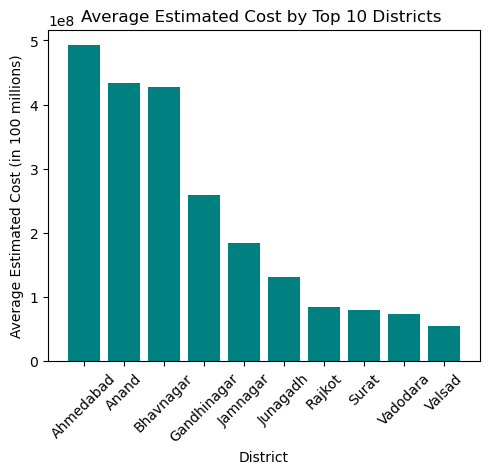

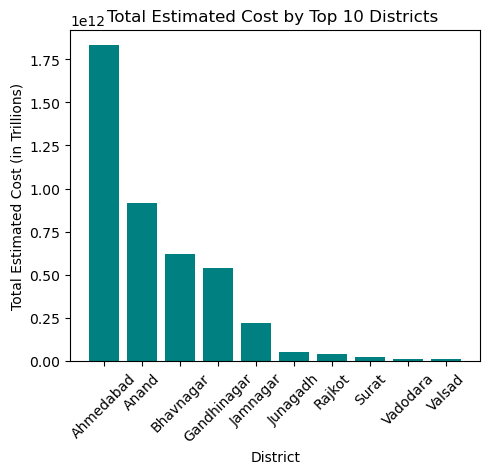

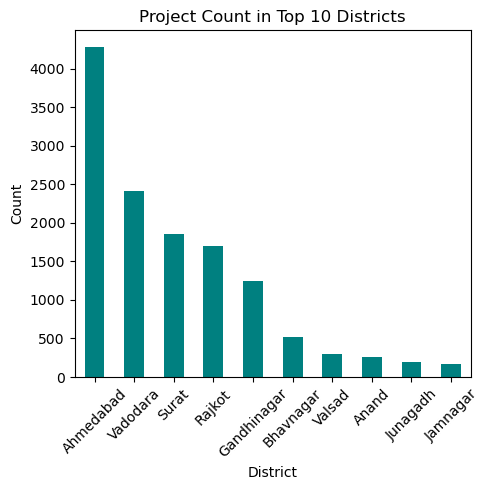

In [17]:
# Drop missing districts
guju1_filtered = guju1.dropna(subset=['distName', 'totalEstimatedCost'])

# Get top 10 districts by count
top_districts = guju1_filtered['distName'].value_counts().head(10).index

# Filter to just those top districts
top_districts_df = guju1_filtered[guju1_filtered['distName'].isin(top_districts)]

# Group by distName
cost_by_district = top_districts_df.groupby('distName')['totalEstimatedCost'].agg(['mean', 'sum']).reset_index()

# Bar chart: Average Estimated Cost
plt.figure(figsize=(5, 5))
plt.bar(cost_by_district['distName'], cost_by_district['mean'].sort_values(ascending=False), color='teal')
plt.title('Average Estimated Cost by Top 10 Districts ')
plt.xlabel('District')
plt.ylabel('Average Estimated Cost (in 100 millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Total Estimated Cost
plt.figure(figsize=(5, 5))
plt.bar(cost_by_district['distName'], cost_by_district['sum'].sort_values(ascending=False), color='teal')
plt.title('Total Estimated Cost by Top 10 Districts ')
plt.xlabel('District')
plt.ylabel('Total Estimated Cost (in Trillions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart: Project Count
plt.figure(figsize=(5, 5))
guju1_filtered['distName'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Project Count in Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## totalEstimatedCost on projectType and distName

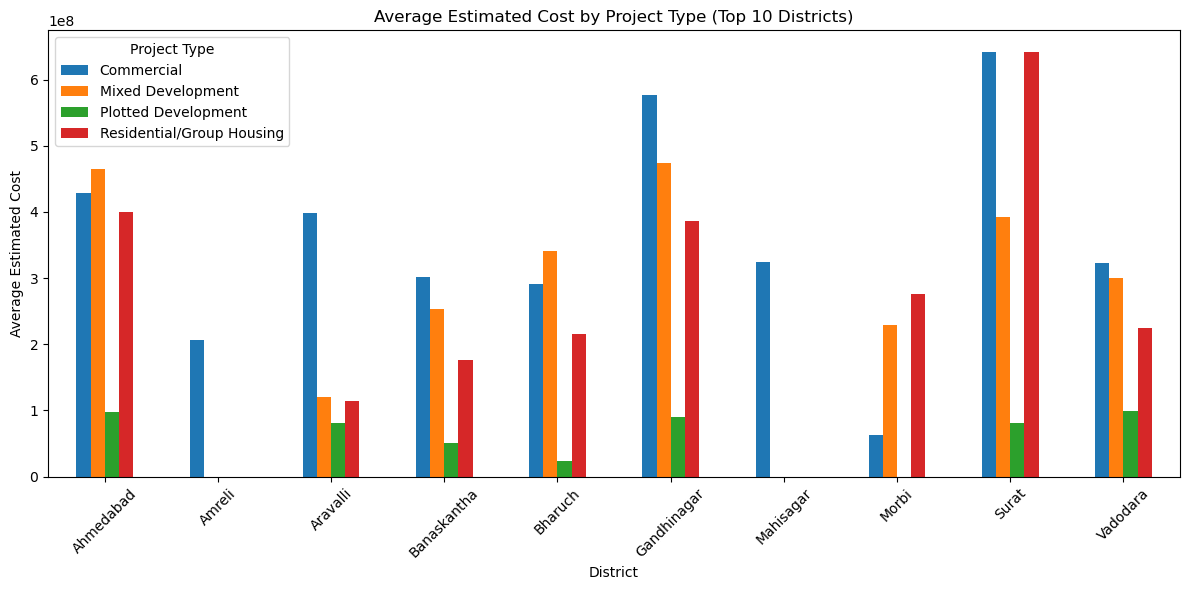

In [19]:
#Average Estimated Cost by Project Type (Top 10 Districts)
filtered_guju1 = guju1.dropna(subset=['distName', 'totalEstimatedCost', 'projectType'])
top_10_districts = (filtered_guju1.groupby('distName')['totalEstimatedCost'].mean().sort_values(ascending=False).head(10).index)
top_district_data = filtered_guju1[filtered_guju1['distName'].isin(top_10_districts)]
grouped = top_district_data.groupby(['distName', 'projectType'])['totalEstimatedCost'].mean().unstack()

# Plot
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Estimated Cost by Project Type (Top 10 Districts)')
plt.xlabel('District')
plt.ylabel('Average Estimated Cost')
plt.xticks(rotation=45)
plt.legend(title='Project Type')
plt.tight_layout()
plt.show()

## Time Series Analysis on totalEstimatedCost

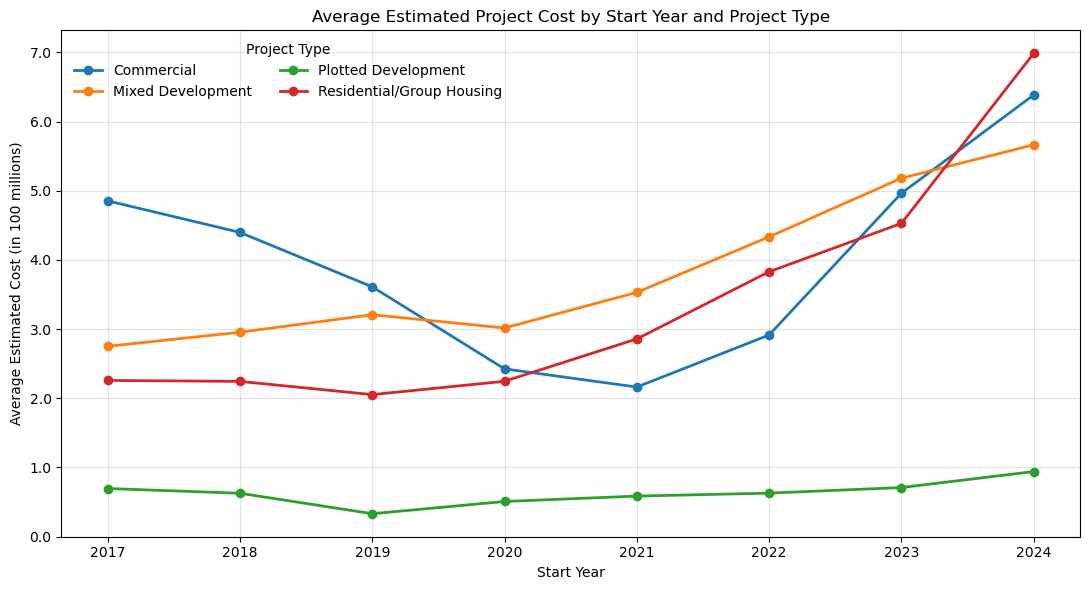

In [21]:
# numeric target
df = guju1.copy()
df['totalEstimatedCost'] = pd.to_numeric(df['totalEstimatedCost'], errors='coerce')
df['startProjectYear'] = pd.to_numeric(df['startProjectYear'], errors='coerce').round()
df = df.dropna(subset=['totalEstimatedCost', 'startProjectYear', 'projectType'])
df['startProjectYear'] = df['startProjectYear'].astype(int)

# Restrict to a sensible window
df = df[(df['startProjectYear'] >= 2017) & (df['startProjectYear'] <= 2026)]

# Group: average cost by year & projectType
avg = (df.groupby(['startProjectYear', 'projectType'])['totalEstimatedCost']
         .mean()
         .reset_index())

# Pivot to wide for multi-line plot
pivot = (avg.pivot(index='startProjectYear', columns='projectType', values='totalEstimatedCost')
             .sort_index())

# Plot 
plt.figure(figsize=(11, 6))

# scale to 100 millions if you like (1e8)
scale = 1e8
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col] / scale, marker='o', linewidth=2, label=col)

plt.title('Average Estimated Project Cost by Start Year and Project Type')
plt.xlabel('Start Year')
plt.ylabel('Average Estimated Cost (in 100 millions)')
plt.grid(True, alpha=0.35)
plt.xticks(pivot.index, rotation=0)

# nice y-axis formatting (no scientific notation)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.1f}'))

plt.legend(title='Project Type', ncol=2, frameon=False)
plt.tight_layout()
plt.show()

## totalUnits on totalEstimatedCost

/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_68141/2588635122.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guju1_filtered['unitRange'] = pd.cut(guju1_filtered['totalUnits'], bins=bin_edges)


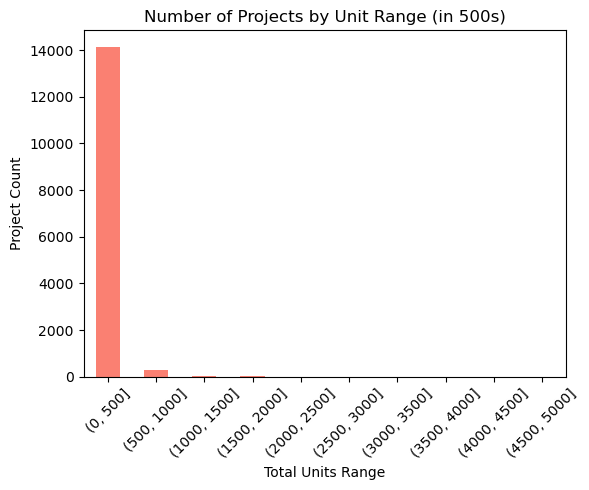

/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_68141/2588635122.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_per_bin = guju1_filtered.groupby('unitRange')['totalEstimatedCost'].mean().sort_index()


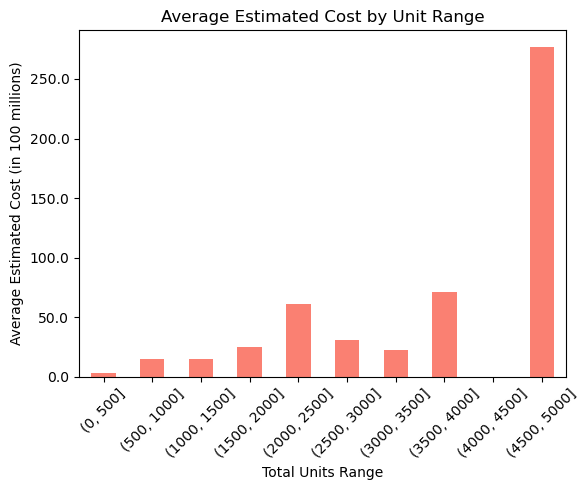

In [23]:
# Ensure columns are numeric
guju1['totalUnits'] = pd.to_numeric(guju1['totalUnits'], errors='coerce')
guju1['totalEstimatedCost'] = pd.to_numeric(guju1['totalEstimatedCost'], errors='coerce')

# Drop rows with missing data
guju1_filtered = guju1.dropna(subset=['totalUnits', 'totalEstimatedCost'])

# Create bins in steps of 500 units
bin_edges = range(0, int(guju1_filtered['totalUnits'].max()) + 500, 500)
guju1_filtered['unitRange'] = pd.cut(guju1_filtered['totalUnits'], bins=bin_edges)

# Histogram: Project Count per Unit Range
project_counts = guju1_filtered['unitRange'].value_counts().sort_index()
plt.figure(figsize=(6, 5))
project_counts.plot(kind='bar', color='salmon')
plt.title('Number of Projects by Unit Range (in 500s)')
plt.xlabel('Total Units Range')
plt.ylabel('Project Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Average Estimated Cost per Unit Range (formatted in 1e8)
formatter_1e8 = FuncFormatter(lambda x, _: f'{x*1e-8:.1f}')
avg_cost_per_bin = guju1_filtered.groupby('unitRange')['totalEstimatedCost'].mean().sort_index()
plt.figure(figsize=(6, 5))
ax = avg_cost_per_bin.plot(kind='bar', color='salmon')
plt.title('Average Estimated Cost by Unit Range')
plt.xlabel('Total Units Range')
plt.ylabel('Average Estimated Cost (in 100 millions)')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(formatter_1e8)
plt.tight_layout()
plt.show()

## bookingRatio on totalEstimatedCost

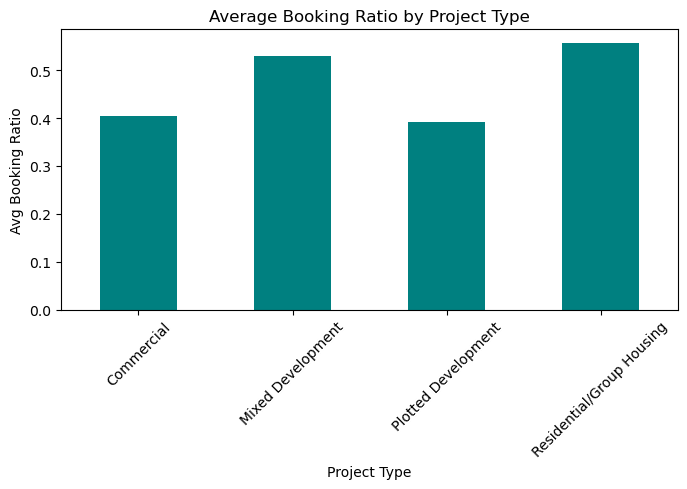

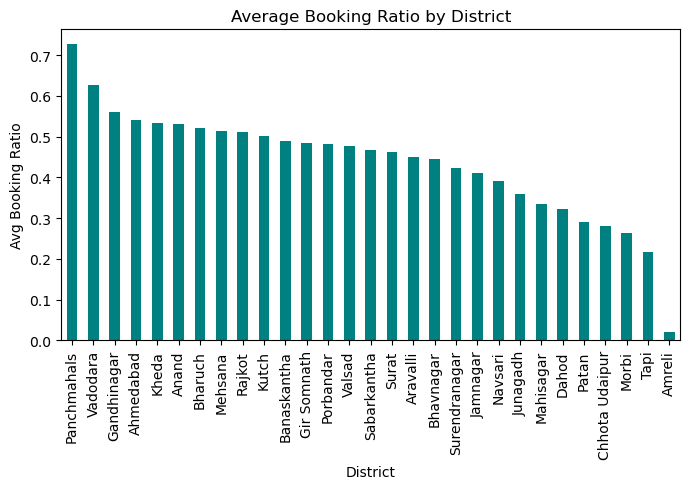

In [25]:
guju1['bookingRatio'] = guju1['bookedUnits'] / guju1['totalUnits']

# Drop rows with missing booking ratio or project type
guju1_clean = guju1.dropna(subset=['bookingRatio', 'projectType'])

# Group and plot
avg_booking_ratio = guju1_clean.groupby('projectType')['bookingRatio'].mean()

plt.figure(figsize=(7, 5))
avg_booking_ratio.plot(kind='bar', color='teal')
plt.title('Average Booking Ratio by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Avg Booking Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Drop rows with missing booking ratio or district name
guju1_clean = guju1.dropna(subset=['bookingRatio', 'distName'])

# Group and plot
avg_booking_ratio = guju1_clean.groupby('distName')['bookingRatio'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
avg_booking_ratio.plot(kind='bar', color='teal')
plt.title('Average Booking Ratio by District')
plt.xlabel('District')
plt.ylabel('Avg Booking Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Profitability Analysis

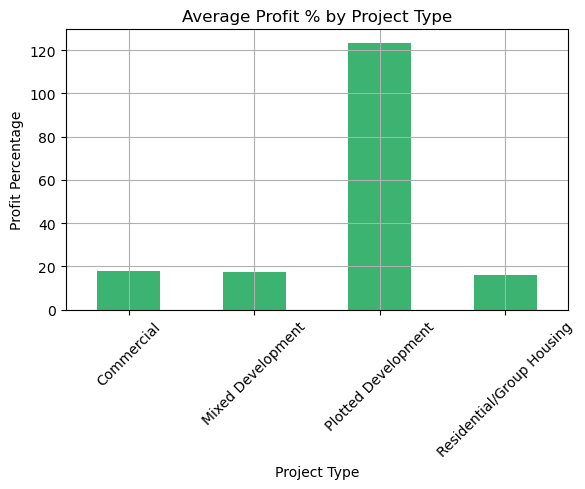

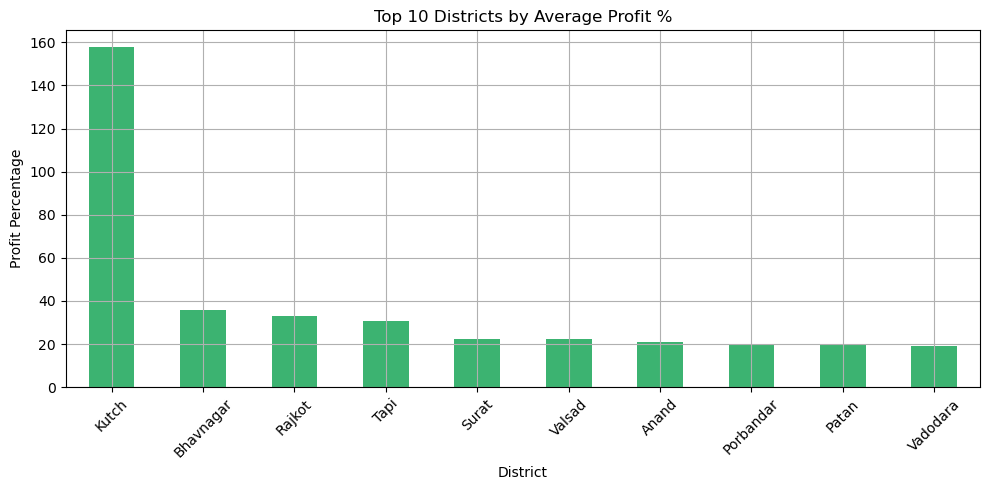

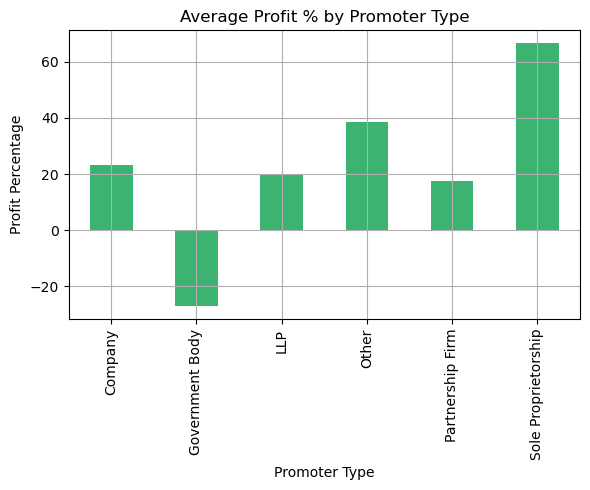

In [27]:
# Create profit percentage column
guju1['profit_pct'] = ((guju1['totalSellingAmount'] - guju1['totalEstimatedCost']) / guju1['totalEstimatedCost']) * 100

# Drop rows with NaNs
guju1_clean = guju1.dropna(subset=['profit_pct', 'projectType', 'distName', 'promoterType'])

# Profit % by Project Type
by_project_type = guju1_clean.groupby('projectType')['profit_pct'].mean()

plt.figure(figsize=(6, 5))
by_project_type.plot(kind='bar', color='mediumseagreen')
plt.title('Average Profit % by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Profit Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Profit % by Top 10 Districts
by_district = guju1_clean.groupby('distName')['profit_pct'].mean()
top_10_districts = by_district.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_10_districts.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Districts by Average Profit %')
plt.xlabel('District')
plt.ylabel('Profit Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Profit % by Promoter Type
by_promoter = guju1_clean.groupby('promoterType')['profit_pct'].mean()

plt.figure(figsize=(6, 5))
by_promoter.plot(kind='bar', color='mediumseagreen')
plt.title('Average Profit % by Promoter Type')
plt.xlabel('Promoter Type')
plt.ylabel('Profit Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

# Data Processing

In [29]:
guju.columns

Index(['projectRegId', 'projectName', 'promoterName', 'projectType',
       'promoterType', 'architect_name', 'eng_name', 'projectAddress',
       'projectAddress2', 'pinCode', 'tPNo', 'underRedevelopment', 'distName',
       'tpo_code', 'startDate', 'location_coordinates', 'startProjectYear',
       'startProjectMonth', 'completionDate', 'EndProjectYear',
       'EndProjectMonth', 'totalProjects', 'totalUnits', 'bookedUnits',
       'noOfInventory', 'avgUnits', 'totalEstimatedCost', 'totalIncurredCost',
       'totalPayableAmountGovernment', 'totalDevelopCost',
       'totalSellingAmount', 'bookedSellingAmount', 'totalReceivedAmount',
       'bookedReceivedAmount', 'totalLandCost', 'avgEstimatedCost_AllProjects',
       'totalCarpetArea_form3A', 'totalBuiltupArea_form3A',
       'totalSquareFootBuild', 'AvgSquareFootBuild', 'avgCostPerSqFt',
       'avgCostPerUnit', 'totalAreaOfLand', 'AvgAreaOfLand'],
      dtype='object')

In [30]:
guju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   projectRegId                  14507 non-null  int64  
 1   projectName                   14507 non-null  object 
 2   promoterName                  14506 non-null  object 
 3   projectType                   14507 non-null  object 
 4   promoterType                  14507 non-null  object 
 5   architect_name                9801 non-null   object 
 6   eng_name                      9641 non-null   object 
 7   projectAddress                13631 non-null  object 
 8   projectAddress2               13388 non-null  object 
 9   pinCode                       7710 non-null   float64
 10  tPNo                          7054 non-null   object 
 11  underRedevelopment            14505 non-null  object 
 12  distName                      13632 non-null  object 
 13  t

In [31]:
print(guju.describe())

       projectRegId        pinCode  startProjectYear  startProjectMonth  \
count  14507.000000    7710.000000      13632.000000       13632.000000   
mean   11133.280003  382288.148638       2019.185960           6.204812   
std     6418.551335   11194.631044          2.972764           3.465840   
min       12.000000  350055.000000       2005.000000           1.000000   
25%     6061.500000  380049.000000       2017.000000           3.000000   
50%    10399.000000  382428.000000       2019.000000           6.000000   
75%    17356.500000  391101.000000       2022.000000           9.000000   
max    24634.000000  396450.000000       2024.000000          12.000000   

       EndProjectYear  EndProjectMonth  totalProjects    totalUnits  \
count    13632.000000     13632.000000        14507.0  14486.000000   
mean      2023.490610         8.040200            1.0    120.209444   
std          2.980099         3.619614            0.0    162.611994   
min       2017.000000         1.000000  

In [32]:
guju["totalEstimatedCost"].describe()

count    1.450500e+04
mean     3.259395e+08
std      6.044184e+08
min      3.000000e+05
25%      6.241800e+07
50%      1.646995e+08
75%      3.576822e+08
max      2.769942e+10
Name: totalEstimatedCost, dtype: float64

## Dropping Redundant Variables

In [34]:
# Dropping Pure Identifiers
columns_to_drop = [
    'projectRegId', 
    'projectName', 
    'projectAddress', 
    'projectAddress2',
    'location_coordinates',
    'pinCode',
    'tPNo'
]

guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

In [35]:
# Data Leakage and Redundant Variables
columns_to_drop = [
    'bookedUnits',
    'totalSellingAmount',
    'bookedSellingAmount',
    'totalReceivedAmount',
    'bookedReceivedAmount',
    'avgEstimatedCost_AllProjects',
    'avgCostPerSqFt',
    'avgCostPerUnit',
    'totalProjects',
    'totalIncurredCost',
    'totalDevelopCost',
    'totalPayableAmountGovernment'
]

guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

## Handling Missing Values

In [37]:
# Compute average land price per sq.ft. per district
guju = guju[pd.qcut(guju['totalEstimatedCost'], q=3, labels=['L','M','H']) != 'H']
land_price_per_area = (guju.groupby('distName')
                            .apply(lambda df: (df['totalLandCost'].sum() / df['totalAreaOfLand'].sum()))
                      )

# Fill missing land area using totalLandCost / district land price
def impute_area(row):
    if pd.isna(row['totalAreaOfLand']):
        price = land_price_per_area.get(row['distName'], np.nan)
        if pd.notna(price) and price > 0:
            return row['totalLandCost'] / price
    return row['totalAreaOfLand']

guju['totalAreaOfLand'] = guju.apply(impute_area, axis=1)

/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_68141/177352239.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  .apply(lambda df: (df['totalLandCost'].sum() / df['totalAreaOfLand'].sum()))
/var/folders/xp/jskbmrqd7_1cvn47ppfbbt_c0000gn/T/ipykernel_68141/177352239.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['totalLandCost'].sum() / df['totalAreaOfLand'].sum()))


In [38]:
# Columns you want to keep without dropna
keep_cols = [
    'bookedUnits',
    'totalSellingAmount',
    'bookedSellingAmount',
    'totalReceivedAmount',
    'bookedReceivedAmount',
    'avgEstimatedCost_AllProjects',
    'avgCostPerSqFt',
    'avgCostPerUnit',
    'totalProjects',
    'totalIncurredCost',
    'totalDevelopCost',
    'totalPayableAmountGovernment',

    'projectRegId', 
    'projectName', 
    'projectAddress', 
    'projectAddress2',
    'location_coordinates',

    'avgUnits',  
    'totalSquareFootBuild',  
    'AvgAreaOfLand',
    'AvgSquareFootBuild',
    'totalBuiltupArea_form3A',
    'noOfInventory',

    'startProjectMonth',
    'startProjectYear',
    'startDate',
    'completionDate'
]

# Identify the columns to apply dropna on
dropna_cols = [col for col in guju.columns if col not in keep_cols]

# Drop rows with NaN in any of those columns
guju = guju.dropna(subset=dropna_cols)

# Check shape difference
print("Dropped DF shape:", guju.shape)

# Fill numeric columns with median
num_cols = guju.select_dtypes(include=["float64", "int64"]).columns
guju[num_cols] = guju[num_cols].fillna(guju[num_cols].median())

Dropped DF shape: (6193, 25)


## Outlier Treatment

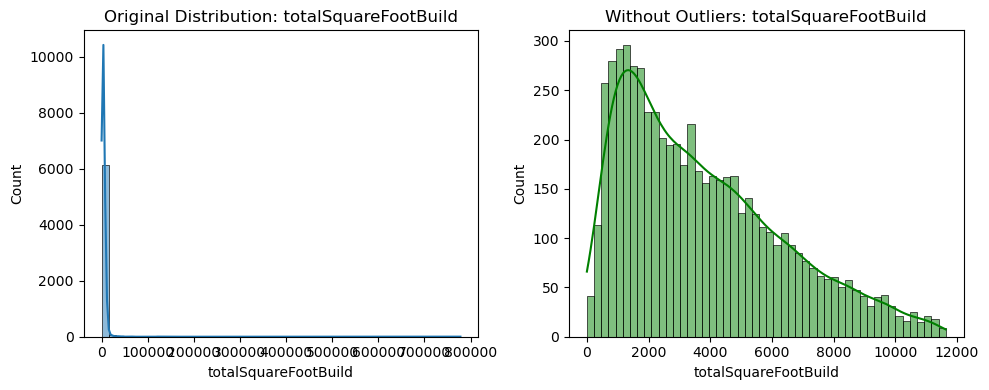

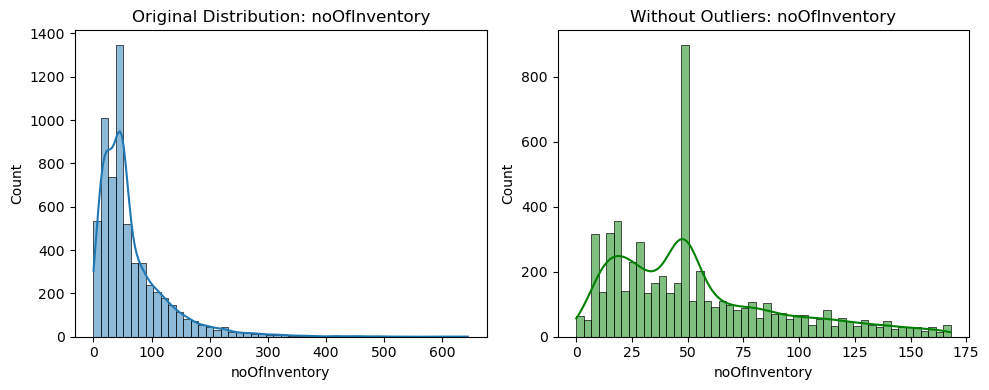

In [40]:
# Columns to check
cols = ['totalSquareFootBuild', 'noOfInventory']

for col in cols:
    # --- Plot original distribution ---
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(guju[col], kde=True, bins=50)
    plt.title(f"Original Distribution: {col}")
    
    # --- Outlier removal using IQR ---
    Q1 = guju[col].quantile(0.25)
    Q3 = guju[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    guju_filtered = guju[(guju[col] >= lower) & (guju[col] <= upper)]
    
    # --- Plot distribution after removing outliers ---
    plt.subplot(1,2,2)
    sns.histplot(guju_filtered[col], kde=True, bins=50, color="green")
    plt.title(f"Without Outliers: {col}")
    
    plt.tight_layout()
    plt.show()

## Multicollinearity Checks

In [42]:
# Select only numerical columns
numerical_df = guju.select_dtypes(include=['int64', 'float64']).copy()
numerical_df = numerical_df.drop(columns=['startProjectMonth','EndProjectMonth'], errors='ignore')

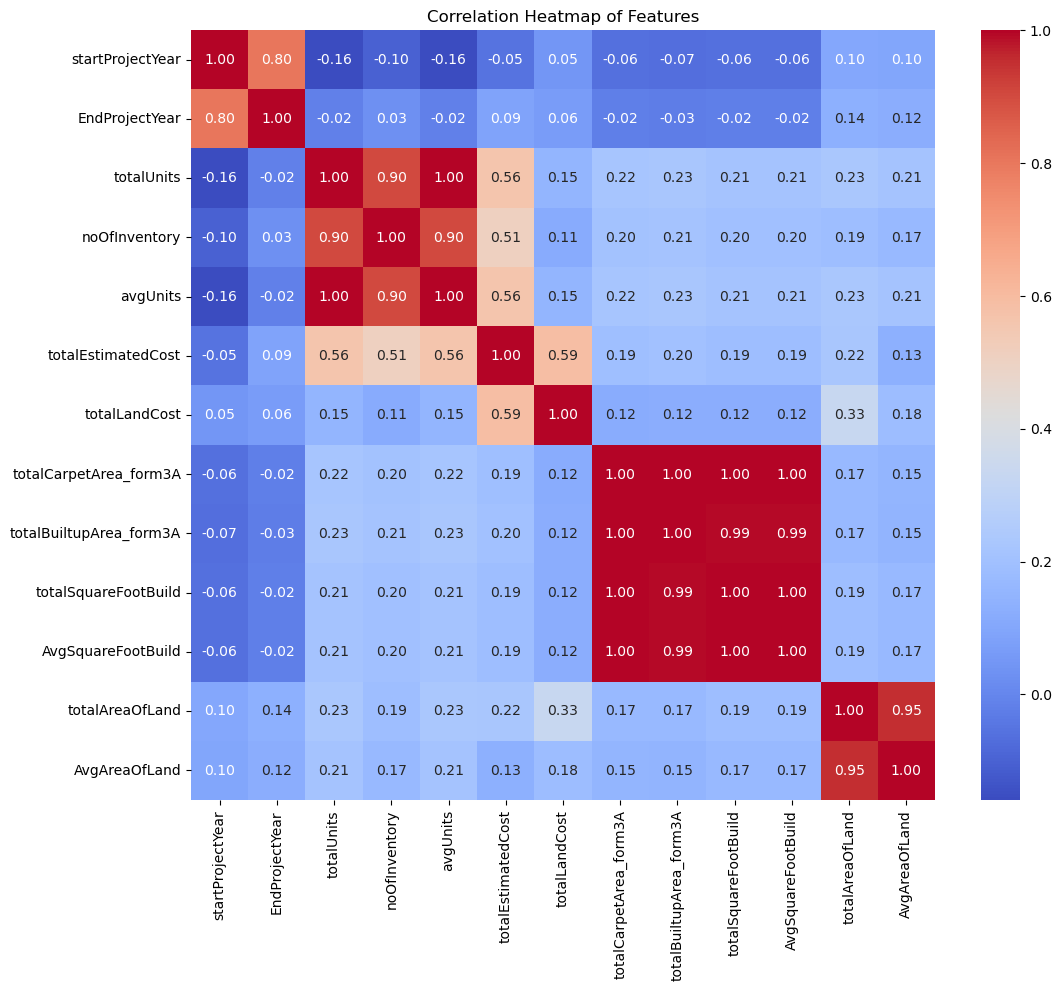

In [43]:
# Correlation heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [44]:
# VIF Analysis
# Drop your target variable if it’s in the numerical dataframe
numerical_df = numerical_df.drop(columns=['totalEstimatedCost'], errors='ignore')
numerical_df = numerical_df.drop(columns=['startProjectMonth','EndProjectMonth'], errors='ignore')

# Add constant for VIF calculation
X = add_constant(numerical_df)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature           VIF
3                totalUnits           inf
5                  avgUnits           inf
9      totalSquareFootBuild           inf
10       AvgSquareFootBuild           inf
0                     const  5.974248e+05
7    totalCarpetArea_form3A  3.055619e+02
8   totalBuiltupArea_form3A  1.660422e+02
11          totalAreaOfLand  1.417978e+01
12            AvgAreaOfLand  1.306034e+01
4             noOfInventory  5.498823e+00
1          startProjectYear  3.006550e+00
2            EndProjectYear  2.923887e+00
6             totalLandCost  1.429063e+00


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [45]:
# Unit Metrics
unit_metrics = guju[['totalUnits', 'avgUnits', 'noOfInventory']]
print("PCC - Unit Metrics")
print(unit_metrics.corr(method='pearson'), "\n")

# Area / Build Size Metrics
area_metrics = guju[['totalCarpetArea_form3A', 'totalBuiltupArea_form3A', 'totalSquareFootBuild', 'AvgSquareFootBuild']]
print("PCC - Area / Build Size Metrics")
print(area_metrics.corr(method='pearson'), "\n")

# Land Area Metrics
land_metrics = guju[['totalAreaOfLand', 'AvgAreaOfLand']]
print("PCC - Land Area Metrics")
print(land_metrics.corr(method='pearson'), "\n")

PCC - Unit Metrics
               totalUnits  avgUnits  noOfInventory
totalUnits       1.000000  1.000000       0.902642
avgUnits         1.000000  1.000000       0.902642
noOfInventory    0.902642  0.902642       1.000000 

PCC - Area / Build Size Metrics
                         totalCarpetArea_form3A  totalBuiltupArea_form3A  \
totalCarpetArea_form3A                 1.000000                 0.996944   
totalBuiltupArea_form3A                0.996944                 1.000000   
totalSquareFootBuild                   0.996138                 0.992998   
AvgSquareFootBuild                     0.996138                 0.992998   

                         totalSquareFootBuild  AvgSquareFootBuild  
totalCarpetArea_form3A               0.996138            0.996138  
totalBuiltupArea_form3A              0.992998            0.992998  
totalSquareFootBuild                 1.000000            1.000000  
AvgSquareFootBuild                   1.000000            1.000000   

PCC - Land Area Metr

In [46]:
# List of columns to drop because they are essentially duplicates
columns_to_drop = [
    'avgUnits',  
    'totalSquareFootBuild',  
    'AvgAreaOfLand',
    'AvgSquareFootBuild',
    'totalBuiltupArea_form3A',
    'noOfInventory'
]

# Drop them only if they exist
guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

In [47]:
# Select only numerical columns
numerical_df = guju.select_dtypes(include=['int64', 'float64']).copy()
numerical_df = numerical_df.drop(columns=['startProjectMonth','EndProjectMonth'], errors='ignore')

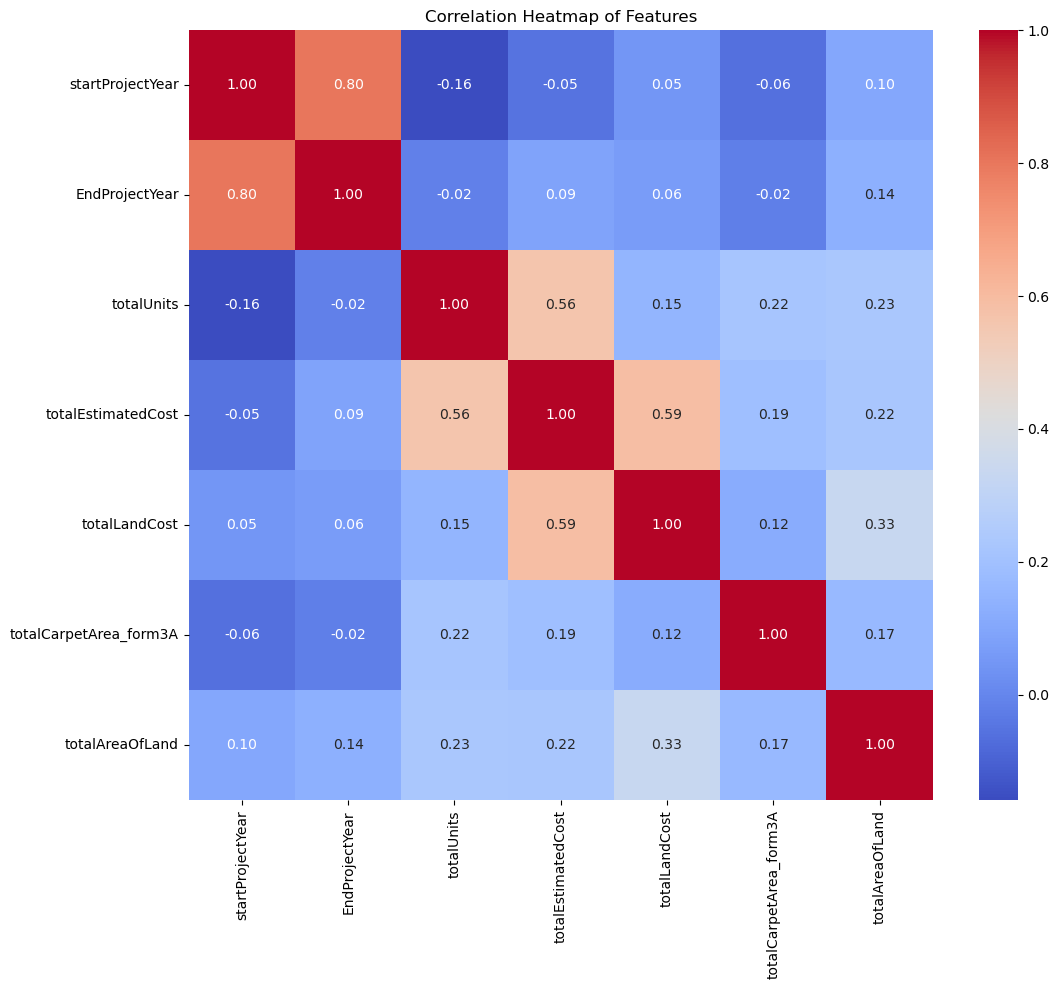

In [48]:
# Correlation heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [49]:
# VIF Analysis
# Drop your target variable if it’s in the numerical dataframe
numerical_df = numerical_df.drop(columns=['totalEstimatedCost'], errors='ignore')
numerical_df = numerical_df.drop(columns=['startProjectMonth','EndProjectMonth'], errors='ignore')

# Add constant for VIF calculation
X = add_constant(numerical_df)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data.sort_values(by="VIF", ascending=False))

                  Feature            VIF
0                   const  587955.696248
1        startProjectYear       2.998065
2          EndProjectYear       2.919029
6         totalAreaOfLand       1.200945
3              totalUnits       1.166524
4           totalLandCost       1.135713
5  totalCarpetArea_form3A       1.073142


## Feature Engineering 

### Cardinality Control (Categorical Variables)

In [52]:
# Loop over all object dtype columns and print unique value counts
for col in guju.columns:
    unique_count = guju[col].nunique(dropna=True)
    print(f"Unique values in '{col}': {unique_count}")

Unique values in 'promoterName': 4810
Unique values in 'projectType': 4
Unique values in 'promoterType': 9
Unique values in 'architect_name': 2967
Unique values in 'eng_name': 2885
Unique values in 'underRedevelopment': 2
Unique values in 'distName': 34
Unique values in 'tpo_code': 87
Unique values in 'startDate': 2532
Unique values in 'startProjectYear': 20
Unique values in 'startProjectMonth': 12
Unique values in 'completionDate': 826
Unique values in 'EndProjectYear': 15
Unique values in 'EndProjectMonth': 12
Unique values in 'totalUnits': 327
Unique values in 'totalEstimatedCost': 6153
Unique values in 'totalLandCost': 5979
Unique values in 'totalCarpetArea_form3A': 6166
Unique values in 'totalAreaOfLand': 5571


In [53]:
# Target column
target = "totalEstimatedCost"

# Setup profile groups
very_high = ['promoterName','architect_name', 'eng_name']
moderate = ['tpo_code', 'distName']
low = ['underRedevelopment', 'projectType', 'promoterType', 
       'startProjectMonth', 'EndProjectMonth']

In [54]:
# Very High Profile
num_bins = 10
numeric_labels = list(range(num_bins))  

# Create a dictionary to store the mapping tables
very_high_group_divisions = {}

for col in very_high:
    # Step 1: Compute average totalEstimatedCost per category
    avg_cost = guju.groupby(col)["totalEstimatedCost"].mean()

    # Step 2: Bin the average costs into quantile-based numeric groups
    binned = pd.qcut(avg_cost, q=num_bins, labels=numeric_labels)

    # Step 3: Map each category in the original column to its group
    guju[f"{col}_cost_group"] = guju[col].map(binned)

    # Store the mapping table
    very_high_group_divisions[col] = pd.DataFrame({
        col: avg_cost.index,
        f"{col}_avg_cost": avg_cost.values,
        f"{col}_group": binned.values
    }).sort_values(f"{col}_avg_cost")

In [55]:
# Moderate Profile
num_bins = 5
numeric_labels = list(range(num_bins))

# Create a dictionary to store the mapping tables
moderate_group_divisions = {}

for col in moderate:
    # Compute mean cost per category
    avg_cost = guju.groupby(col)["totalEstimatedCost"].mean()
    
    # Bin those averages into 5 quantile-based numeric groups
    binned = pd.qcut(avg_cost, q=num_bins, labels=numeric_labels)
    
    # Map group back to original data
    guju[f"{col}_cost_group"] = guju[col].map(binned)
    
    # Store the mapping table
    moderate_group_divisions[col] = pd.DataFrame({
        col: avg_cost.index,
        f"{col}_avg_cost": avg_cost.values,
        f"{col}_group": binned.values
    }).sort_values(f"{col}_avg_cost")

In [56]:
# List of columns to drop 
columns_to_drop = [
    'promoterName',  
    'architect_name',  
    'eng_name',
    'pinCode',
    'tPNo',
    'tpo_code',
    'distName'
]

# Drop them only if they exist
guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

### Log Transformations (Numerical Variables)

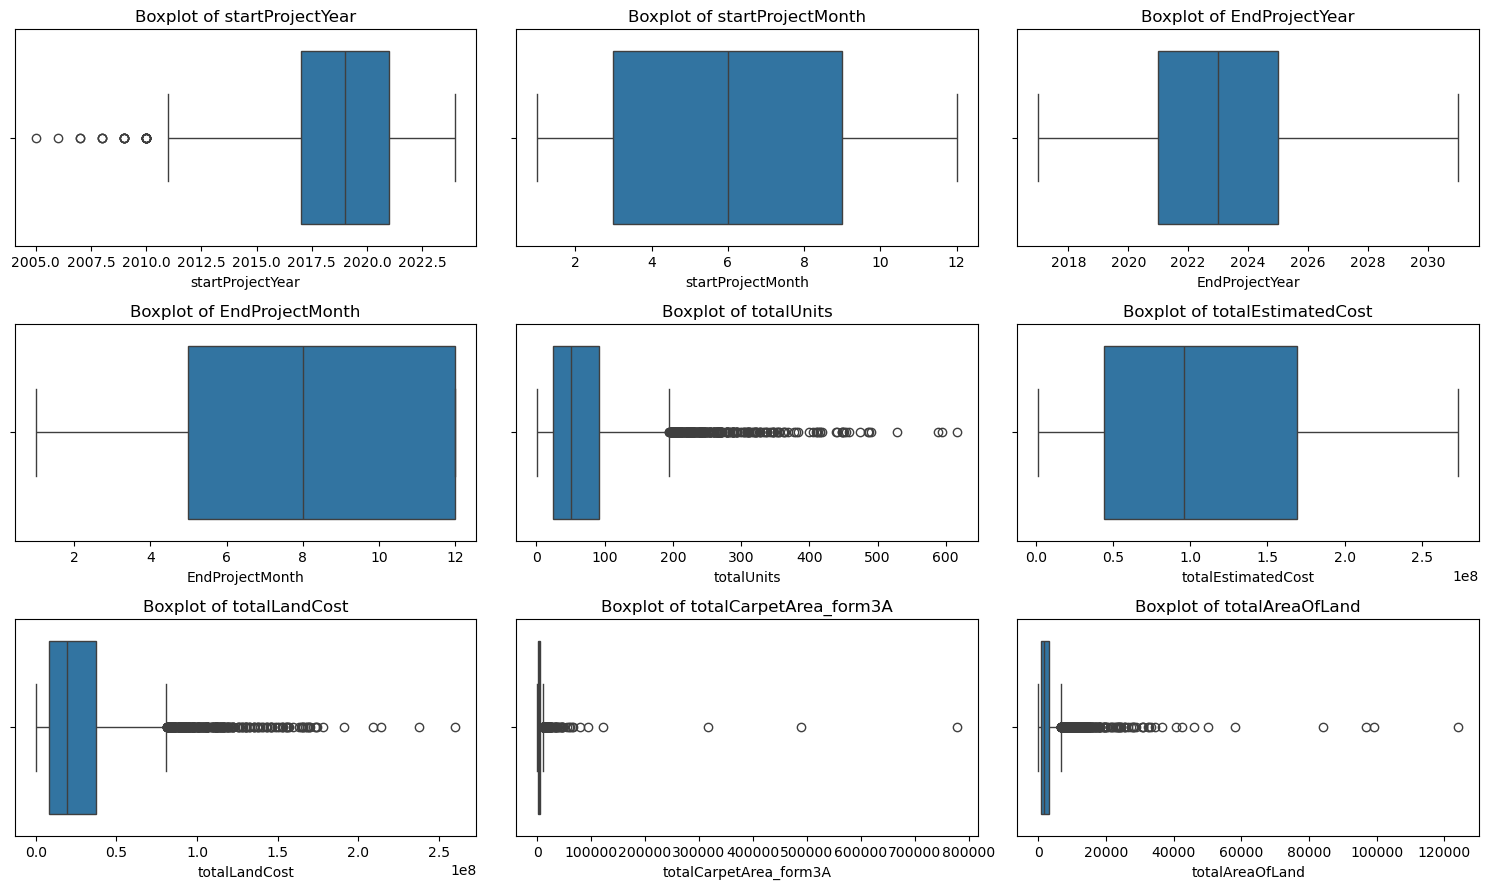

In [58]:
# Select only numeric columns
numeric_cols = guju.select_dtypes(include=['float64', 'int64']).columns

# Define subplot grid size
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=guju[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove any empty subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [59]:
# List of features to transform
log_features = ['totalLandCost', 'totalCarpetArea_form3A', 'totalUnits', 'totalAreaOfLand']

# Apply log1p to features
for col in log_features:
    guju[f'{col}_log'] = np.log1p(guju[col])

In [60]:
# Transform target variable
guju['totalEstimatedCost_log'] = np.log1p(guju['totalEstimatedCost'])

In [61]:
# List of columns to drop because they have been log transformed
columns_to_drop = [
    'totalUnits',  
    'totalLandCost',  
    'totalCarpetArea_form3A',
    'totalAreaOfLand',
    'totalEstimatedCost',
]

# Drop them only if they exist
guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

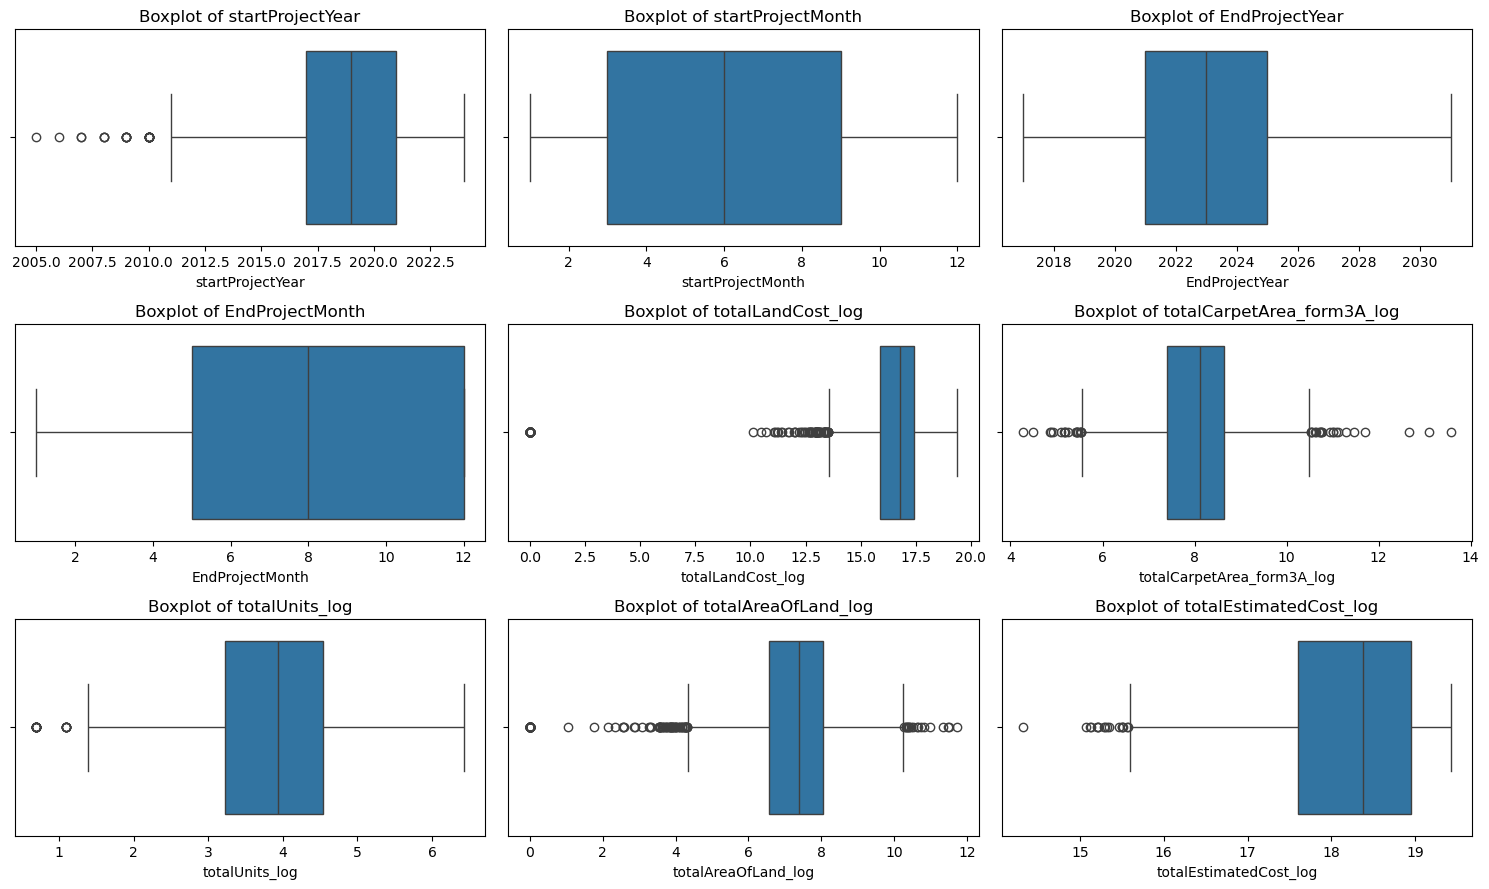

In [62]:
# Select only numeric columns
numeric_cols = guju.select_dtypes(include=['float64', 'int64']).columns

# Define subplot grid size
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=guju[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove any empty subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Duration Feature Addition

In [64]:
# Project duration in months
guju['projectDurationMonths'] = ((guju['EndProjectYear'] - guju['startProjectYear']) * 12) + \
                                (guju['EndProjectMonth'] - guju['startProjectMonth'])

In [65]:
# Select only numerical columns
numerical_df = guju.select_dtypes(include=['int64', 'float64']).copy()
numerical_df = numerical_df.drop(columns=['startProjectMonth','EndProjectMonth'], errors='ignore')

# Drop your target variable if it’s in the numerical dataframe
numerical_df = numerical_df.drop(columns=['totalEstimatedCost'], errors='ignore')

# Add constant for VIF calculation
X = add_constant(numerical_df)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data.sort_values(by="VIF", ascending=False))

                      Feature            VIF
0                       const  615452.294032
1            startProjectYear      49.114744
2              EndProjectYear      47.947610
8       projectDurationMonths      19.192671
4  totalCarpetArea_form3A_log       3.647430
7      totalEstimatedCost_log       2.543905
5              totalUnits_log       2.414848
6         totalAreaOfLand_log       1.870859
3           totalLandCost_log       1.526387


In [66]:
# List of columns to drop 
columns_to_drop = [
    'startProjectMonth',
    "startProjectYear",
    "startDate",
    "completionDate"
]

# Drop them only if they exist
guju = guju.drop(columns=[col for col in columns_to_drop if col in guju.columns])

In [67]:
# Select only numerical columns
numerical_df = guju.select_dtypes(include=['int64', 'float64']).copy()
numerical_df = numerical_df.drop(columns=['StartProjectMonth','EndProjectMonth'], errors='ignore')

# Drop your target variable if it’s in the numerical dataframe
numerical_df = numerical_df.drop(columns=['totalEstimatedCost'], errors='ignore')

# Add constant for VIF calculation
X = add_constant(numerical_df)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIFs
print(vif_data.sort_values(by="VIF", ascending=False))

                      Feature            VIF
0                       const  614016.364246
3  totalCarpetArea_form3A_log       3.647419
6      totalEstimatedCost_log       2.543901
4              totalUnits_log       2.414498
5         totalAreaOfLand_log       1.870859
2           totalLandCost_log       1.526175
7       projectDurationMonths       1.201162
1              EndProjectYear       1.163755


### Label Encode Categorical Variables

In [69]:
# Fill categorical columns with mode and encode
cat_cols = guju.select_dtypes(include=["object", "category"]).columns
guju[cat_cols] = guju[cat_cols].fillna(guju[cat_cols].mode().iloc[0])

le = LabelEncoder()
for col in cat_cols:
    guju[col] = le.fit_transform(guju[col])

# Modelling

In [71]:
guju.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 201 to 14483
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   projectType                 6193 non-null   int64  
 1   promoterType                6193 non-null   int64  
 2   underRedevelopment          6193 non-null   int64  
 3   EndProjectYear              6193 non-null   float64
 4   EndProjectMonth             6193 non-null   float64
 5   promoterName_cost_group     6193 non-null   int64  
 6   architect_name_cost_group   6193 non-null   int64  
 7   eng_name_cost_group         6193 non-null   int64  
 8   tpo_code_cost_group         6193 non-null   int64  
 9   distName_cost_group         6193 non-null   int64  
 10  totalLandCost_log           6193 non-null   float64
 11  totalCarpetArea_form3A_log  6193 non-null   float64
 12  totalUnits_log              6193 non-null   float64
 13  totalAreaOfLand_log         6193 no

## Train and Test Split (80-20)

In [73]:
X = guju.drop(columns=["totalEstimatedCost_log"])
y = guju["totalEstimatedCost_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning

### n_estimators using OOB Scores

In [76]:
base_params = dict(
    bootstrap=True,
    oob_score=True,
    warm_start=False,
    random_state=42,
    n_jobs=-1
)

In [77]:
n_values = list(range(100, 301, 20))

oob_r2_scores = []

for n in n_values:
    rf = RandomForestRegressor(n_estimators=n, **base_params)
    rf.fit(X_train, y_train)   
    oob_r2_scores.append(rf.oob_score_)

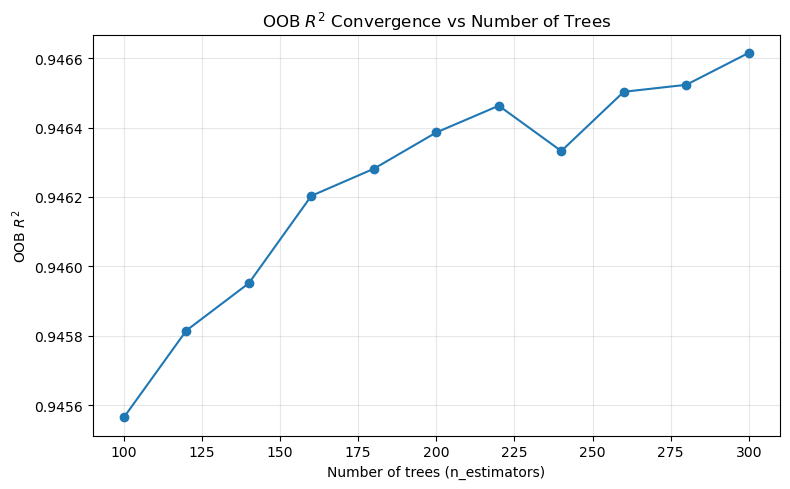

In [78]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, oob_r2_scores, marker='o')
plt.xlabel("Number of trees (n_estimators)")
plt.ylabel("OOB $R^2$")
plt.title("OOB $R^2$ Convergence vs Number of Trees")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### max_features using 5-fold cross validation

In [80]:
max_features_values = [0.2, 0.4, 0.6, 0.8, 1.0]

mean_r2_scores = []
std_r2_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

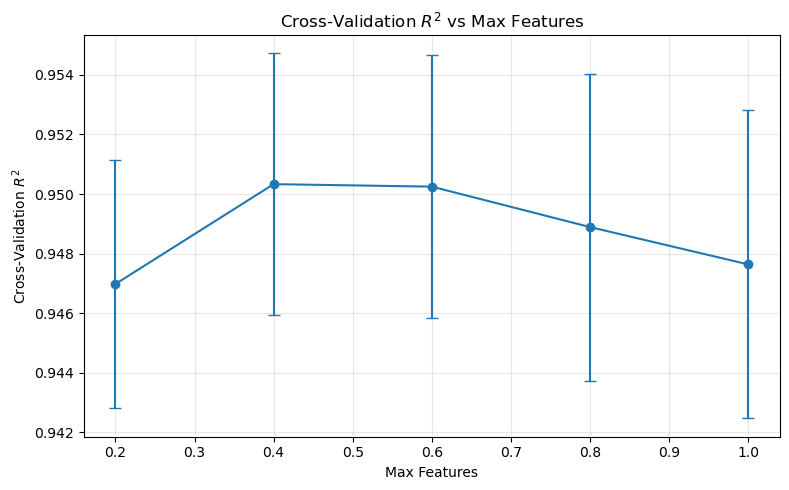

In [81]:
for mf in max_features_values:
    r2_scores = []
    rf = RandomForestRegressor(n_estimators=220, max_features=mf, **base_params)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
    
    mean_r2_scores.append(np.mean(r2_scores))
    std_r2_scores.append(np.std(r2_scores))

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.errorbar(max_features_values, mean_r2_scores, yerr=std_r2_scores, fmt='-o', capsize=4)
plt.xlabel("Max Features")
plt.ylabel("Cross-Validation $R^2$")
plt.title("Cross-Validation $R^2$ vs Max Features")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [82]:
### max_depth using 5-fold cross validation

In [83]:
max_depth_values = [5, 10, 15, 20, 25, 30]    

mean_r2_scores = []
std_r2_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

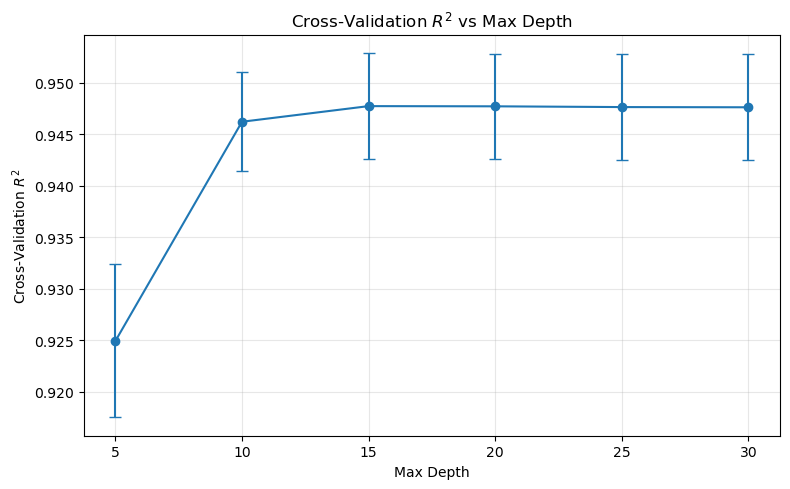

In [84]:
for md in max_depth_values:
    r2_scores = []
    rf = RandomForestRegressor(n_estimators=220, max_depth=md, **base_params)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        r2_scores.append(r2_score(y_test, y_pred))
    
    mean_r2_scores.append(np.mean(r2_scores))
    std_r2_scores.append(np.std(r2_scores))

# --- Plot ---
plt.figure(figsize=(8, 5))
labels = [str(x) for x in max_depth_values]  # for cleaner x-axis
plt.errorbar(labels, mean_r2_scores, yerr=std_r2_scores, fmt='-o', capsize=4)
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validation $R^2$")
plt.title("Cross-Validation $R^2$ vs Max Depth")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Final RF Model (80-20 split)

In [86]:
n_estimators = 220
max_features = 0.4
max_depth = 15
bootstrap = True
oob_score = True
random_state = 42

# RF model
rf_tune = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features,
    bootstrap=bootstrap,
    oob_score=oob_score,
    random_state = random_state,
)

In [87]:
# Model Fit 
rf_tune.fit(X_train, y_train)

# Model Prediction 
y_pred = rf_tune.predict(X_test)

In [88]:
# Performance Metrics in log space
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae_log = mean_absolute_error(y_test, y_pred)

print("=== Metrics in Log Space ===")
print(f"R² Score (log)  : {r2:.4f}")
print(f"RMSE (log): {rmse_log:,.2f}")
print(f"MAE  (log): {mae_log:,.2f}")

# Back-transform to original scale 
y_test_orig = np.expm1(y_test)   
y_pred_orig = np.expm1(y_pred)

# Performance Metrics in original scales
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)

print("\n=== Metrics in Original Scale ===")
print(f"RMSE: {rmse_orig:,.2f}")
print(f"MAE : {mae_orig:,.2f}")

=== Metrics in Log Space ===
R² Score (log)  : 0.9518
RMSE (log): 0.19
MAE  (log): 0.13

=== Metrics in Original Scale ===
RMSE: 17,459,076.21
MAE : 11,447,649.20


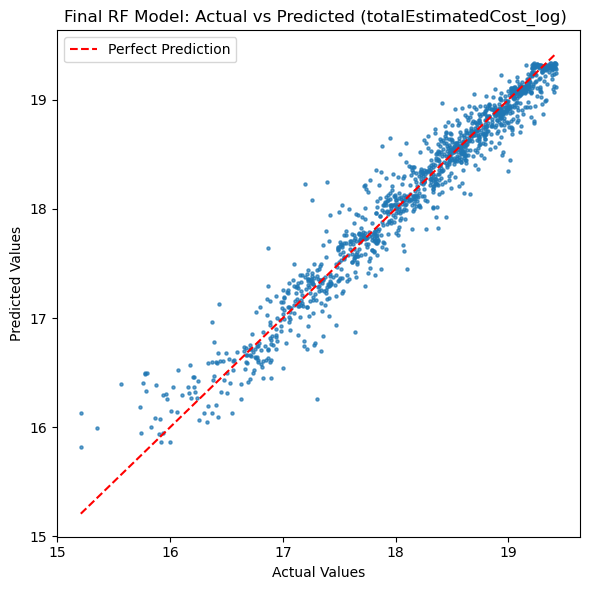

In [89]:
# Predicted Vs Actual Target Values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7,s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final RF Model: Actual vs Predicted (totalEstimatedCost_log) ")

# Identity line (perfect predictions)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

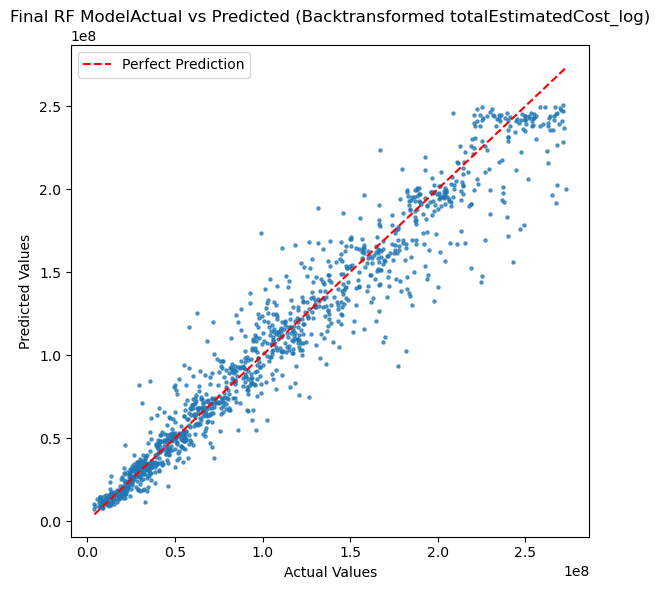

In [90]:
# Predicted Vs Actual Target Values (Back Transformed)
plt.figure(figsize=(6,6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.7, s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final RF ModelActual vs Predicted (Backtransformed totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

## 5-Fold Cross-Validation on final RF model

In [92]:
# Prevent scientific notation
pd.set_option("display.float_format", "{:,.4f}".format)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rows = []

for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]   

    rf_tune.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_tune.predict(X_test_cv)                           

    # Metrics in LOG space 
    r2_log  = r2_score(y_test_cv, y_pred_cv)
    rmse_log = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
    mae_log  = mean_absolute_error(y_test_cv, y_pred_cv)

    # Back-transform to ORIGINAL scale 
    y_test_orig_cv = np.expm1(y_test_cv)
    y_pred_orig_cv = np.expm1(y_pred_cv)

    rmse_orig = np.sqrt(mean_squared_error(y_test_orig_cv, y_pred_orig_cv))
    mae_orig  = mean_absolute_error(y_test_orig_cv, y_pred_orig_cv)

    rows.append({
        "fold": fold,
        "R2_log": r2_log,
        "RMSE_log": rmse_log,
        "MAE_log": mae_log,
        "RMSE_orig": rmse_orig,
        "MAE_orig": mae_orig
    })

# Collect results
cv_df = pd.DataFrame(rows)
print(cv_df)

# Means and standard deviations (no scientific notation)
means = cv_df.drop(columns=["fold"]).mean()
stds  = cv_df.drop(columns=["fold"]).std(ddof=1)

print("\n=== Means across folds ===")
print(means.apply(lambda x: f"{x:,.4f}"))

print("\n=== Standard deviations across folds ===")
print(stds.apply(lambda x: f"{x:,.4f}"))

   fold  R2_log  RMSE_log  MAE_log       RMSE_orig        MAE_orig
0     1  0.9508    0.1999   0.1341 18,756,323.8503 11,926,478.2974
1     2  0.9419    0.2156   0.1348 18,821,677.8680 11,991,017.7915
2     3  0.9520    0.1909   0.1336 18,378,971.4535 11,842,002.4575
3     4  0.9548    0.1905   0.1295 18,554,141.3290 12,047,127.1755
4     5  0.9518    0.1921   0.1332 17,459,076.2098 11,447,649.2025

=== Means across folds ===
R2_log                0.9503
RMSE_log              0.1978
MAE_log               0.1330
RMSE_orig    18,394,038.1421
MAE_orig     11,850,854.9849
dtype: object

=== Standard deviations across folds ===
R2_log             0.0049
RMSE_log           0.0107
MAE_log            0.0021
RMSE_orig    550,940.2236
MAE_orig     237,981.3757
dtype: object


## Baseline Model Comparison 

In [94]:
# Scaling the independent variables for baseline models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform on training set
X_test_scaled  = scaler.transform(X_test)        # ONLY transform on test set


### Linear Regression

In [96]:
# Model Fit
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [97]:
# Metrics on log scale
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
r2_lr   = r2_score(y_test, y_pred_lr)

print("Linear Regression (log scale):")
print(f"RMSE: {rmse_lr:,.2f}")
print(f"MAE : {mae_lr:,.2f}")
print(f"R²  : {r2_lr:.4f}")
print("")

# Back-transform to original scale
y_test_orig     = np.expm1(y_test)
y_pred_lr_orig  = np.expm1(y_pred_lr)

# Metrics on original scale
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_lr_orig))
mae_orig  = mean_absolute_error(y_test_orig, y_pred_lr_orig)

print("=== Metrics in Original Scale ===")
print(f"RMSE: {rmse_orig:,.2f}")
print(f"MAE : {mae_orig:,.2f}")

Linear Regression (log scale):
RMSE: 0.33
MAE : 0.24
R²  : 0.8596

=== Metrics in Original Scale ===
RMSE: 32,044,726.23
MAE : 20,917,636.59


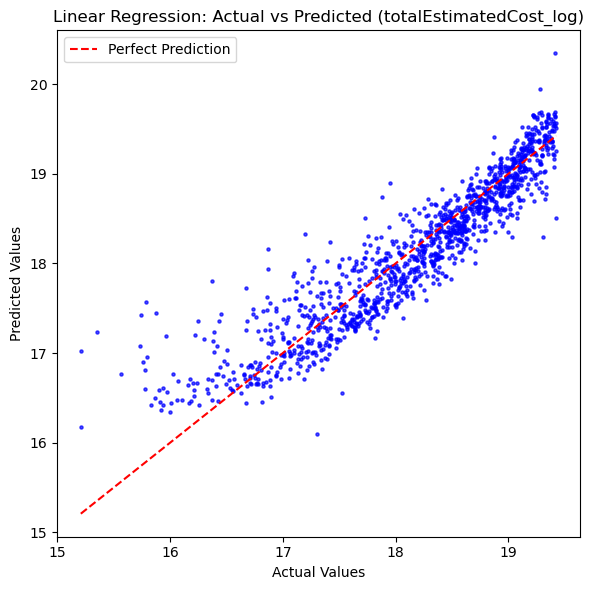

In [98]:
# Predicted vs Actual Plot (Log Scale)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted (totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

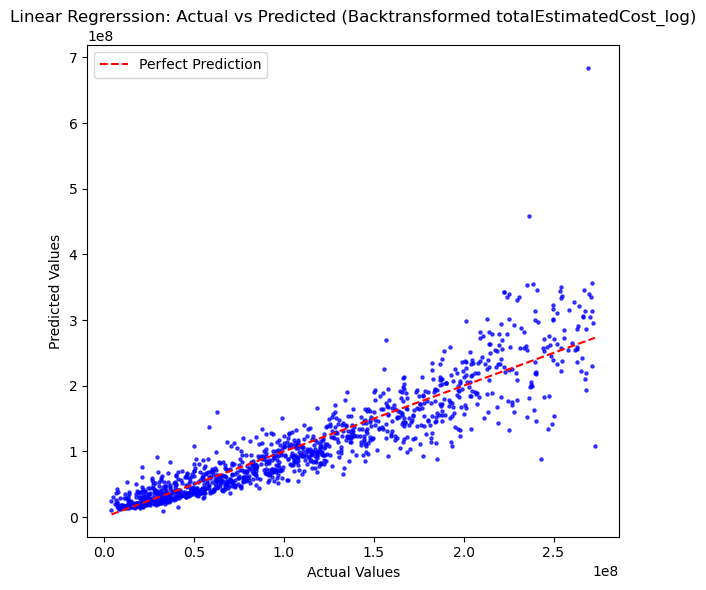

In [99]:
# Predicted Vs Actual Target Plot (Original Scale)
plt.figure(figsize=(6,6))
plt.scatter(y_test_orig, y_pred_lr_orig, alpha=0.7, color='blue', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regrerssion: Actual vs Predicted (Backtransformed totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

### Polynomial Regression

In [101]:
# Model Fit
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),LinearRegression())
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_test_scaled)

In [102]:
# Evaluate
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print("Polynomial Regression (Degree 2):")
print(f"RMSE: {rmse_poly:,.2f}")
print(f"MAE : {mae_poly:,.2f}")
print(f"R²  : {r2_poly:.4f}")
print("")

# Back-transform to original scale
y_test_orig     = np.expm1(y_test)
y_pred_poly_orig  = np.expm1(y_pred_poly)

# Metrics on original scale
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_poly_orig))
mae_orig  = mean_absolute_error(y_test_orig, y_pred_poly_orig)

print("=== Metrics in Original Scale ===")
print(f"RMSE: {rmse_orig:,.2f}")
print(f"MAE : {mae_orig:,.2f}")

Polynomial Regression (Degree 2):
RMSE: 0.24
MAE : 0.17
R²  : 0.9227

=== Metrics in Original Scale ===
RMSE: 22,116,908.48
MAE : 14,971,984.09


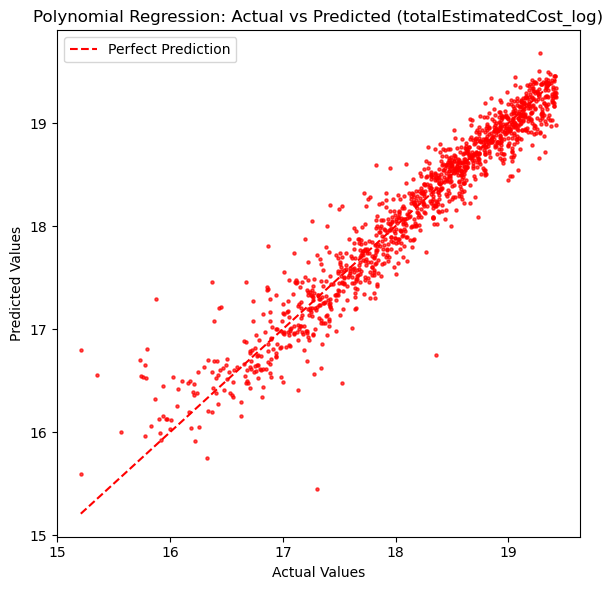

In [103]:
# Predicted vs Actual Plot (Log Scale) - Polynomial Regression
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='red', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted (totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

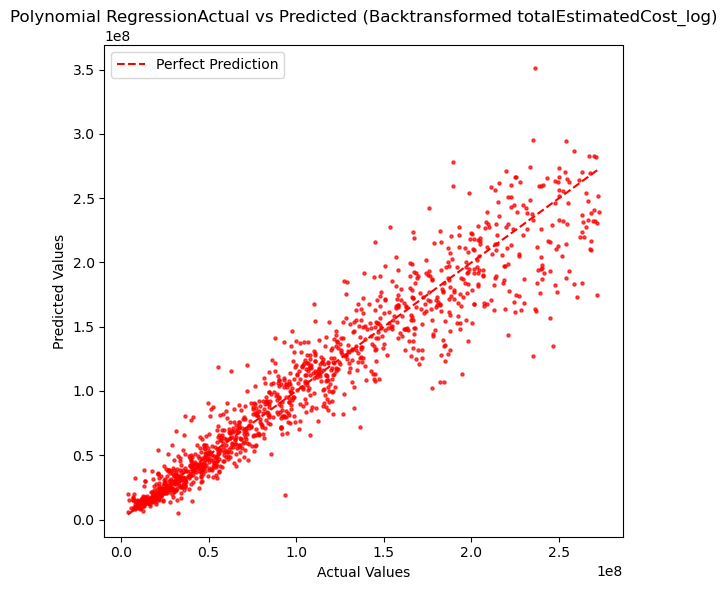

In [104]:
# Predicted Vs Actual Target Values (Original Scale)
plt.figure(figsize=(6,6))
plt.scatter(y_test_orig, y_pred_poly_orig, alpha=0.7, color='red', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial RegressionActual vs Predicted (Backtransformed totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

### Support Vector Regression

In [106]:
# Model Fit
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [107]:
# Performance Metrics
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("Support Vector Regression:")
print(f"RMSE: {rmse_svr:,.2f}")
print(f"MAE : {mae_svr:,.2f}")
print(f"R²  : {r2_svr:.4f}")

# Back-transform to original scale 
y_test_orig     = np.expm1(y_test)
y_pred_svr_orig  = np.expm1(y_pred_svr)

# Metrics on original scale
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_svr_orig))
mae_orig  = mean_absolute_error(y_test_orig, y_pred_svr_orig)

print("=== Metrics in Original Scale ===")
print(f"RMSE: {rmse_orig:,.2f}")
print(f"MAE : {mae_orig:,.2f}")

Support Vector Regression:
RMSE: 0.22
MAE : 0.15
R²  : 0.9357
=== Metrics in Original Scale ===
RMSE: 19,559,042.36
MAE : 13,458,060.08


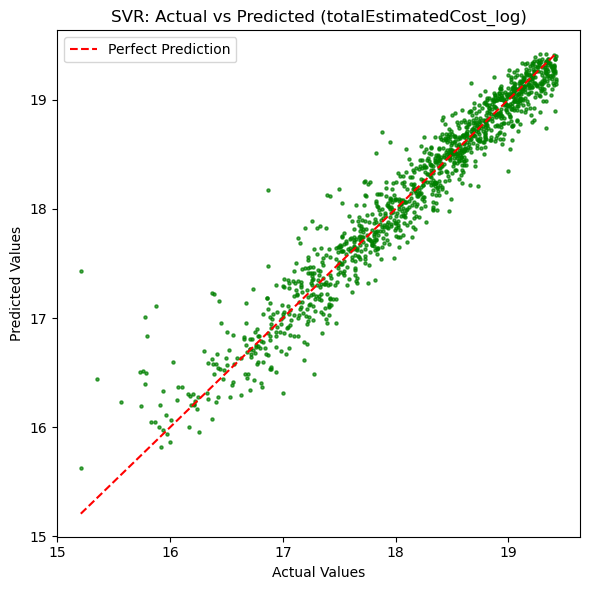

In [108]:
# Predicted vs Actual Plot (Log Scale) - SVR
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svr, alpha=0.7, color='green', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted (totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

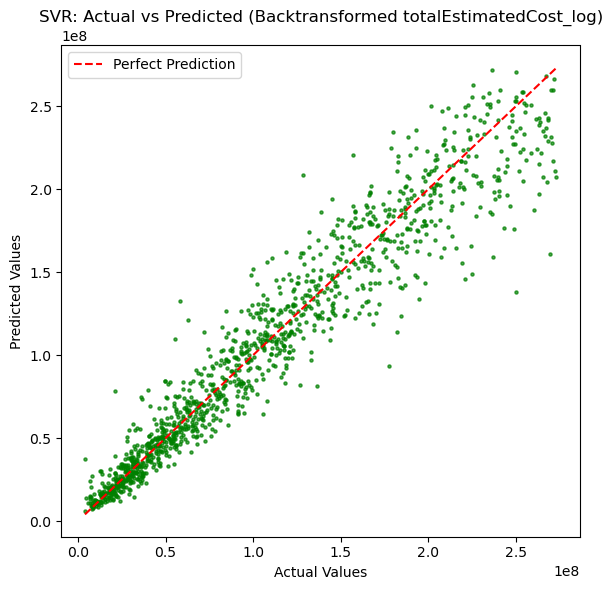

In [109]:
# Predicted Vs Actual Target Values (Original Scale)
plt.figure(figsize=(6,6))
plt.scatter(y_test_orig, y_pred_svr_orig, alpha=0.7, color='green', s=5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted (Backtransformed totalEstimatedCost_log)")

# Perfect prediction line
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()],
         'r--', label="Perfect Prediction")

plt.legend()
plt.tight_layout()
plt.show()

# Feature Analysis

## Feature Importance Graph

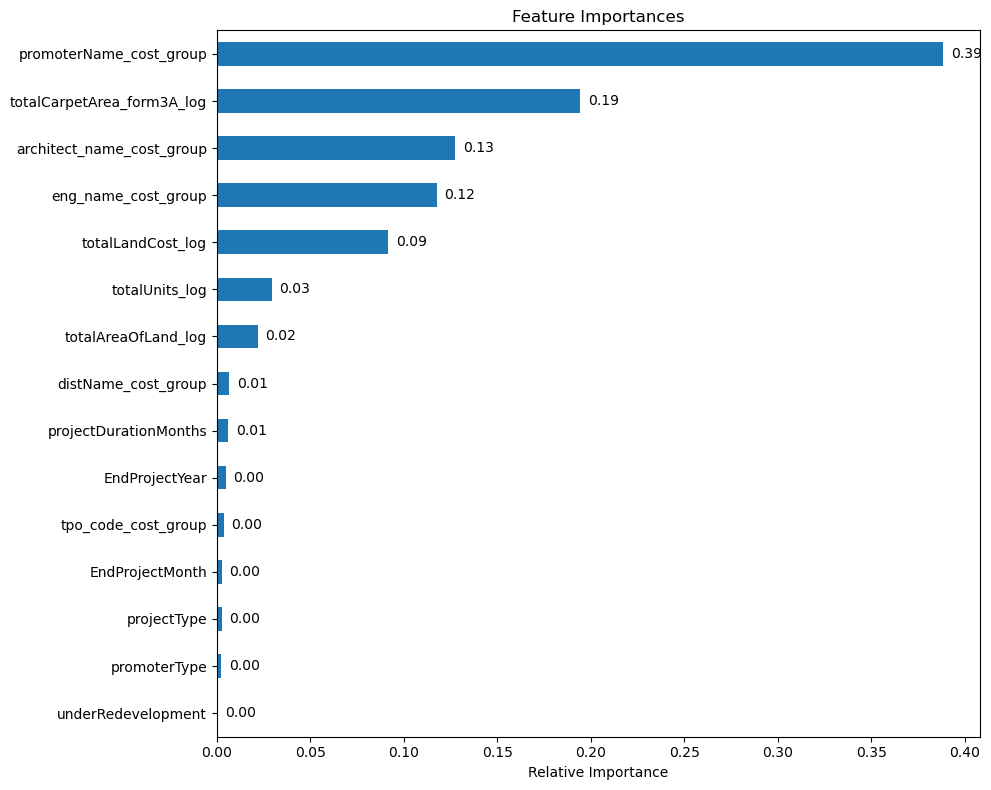

In [112]:
importances = pd.Series(rf_tune.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
ax = importances.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()

# --- Annotate values on bars ---
for i, (val, name) in enumerate(zip(importances, importances.index)):
    ax.text(val + 0.004, i, f"{val:.2f}", va='center')

plt.show()

## Sensitivity Analysis (a.k.a. Partial Dependence)

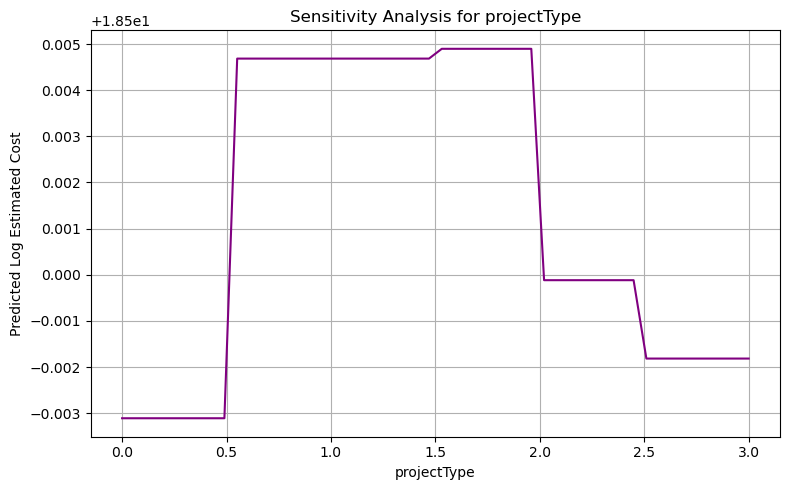

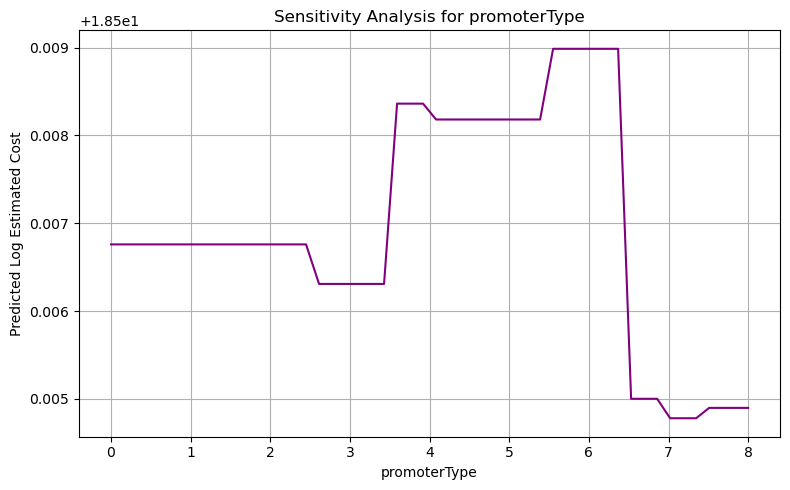

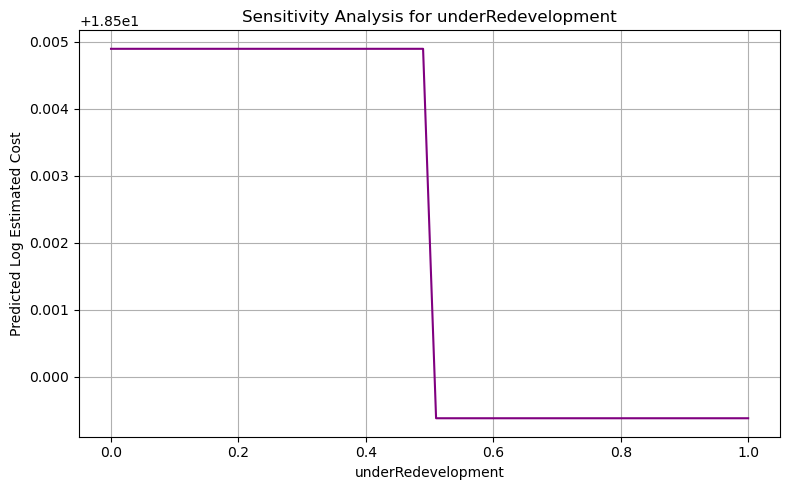

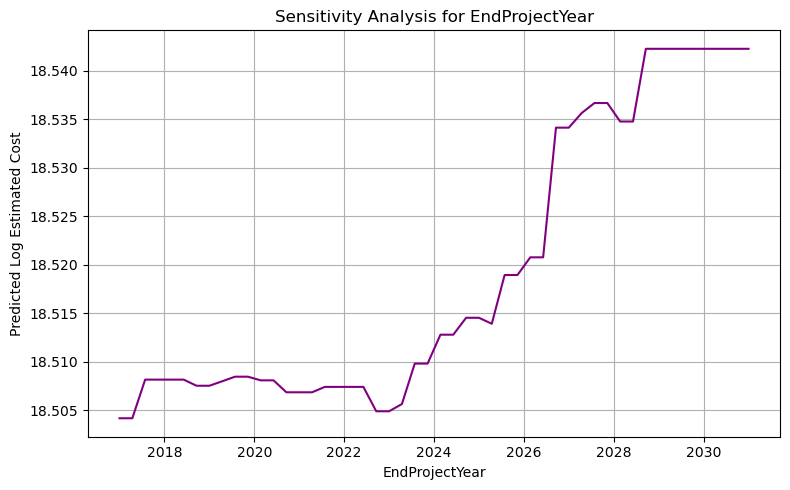

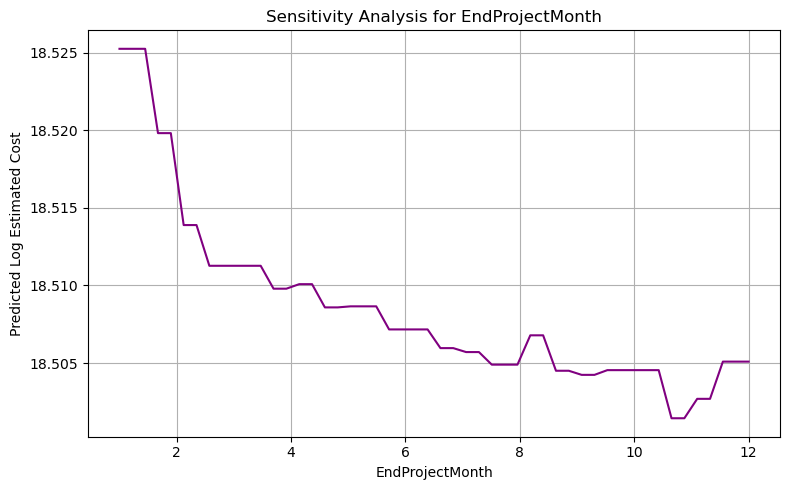

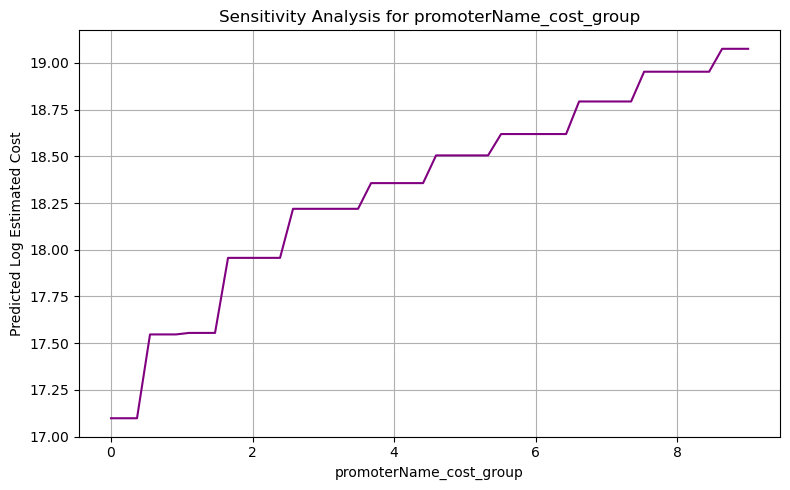

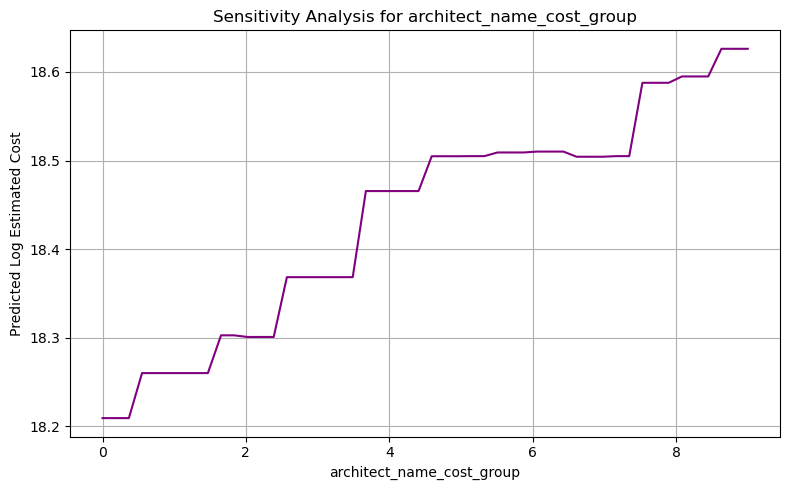

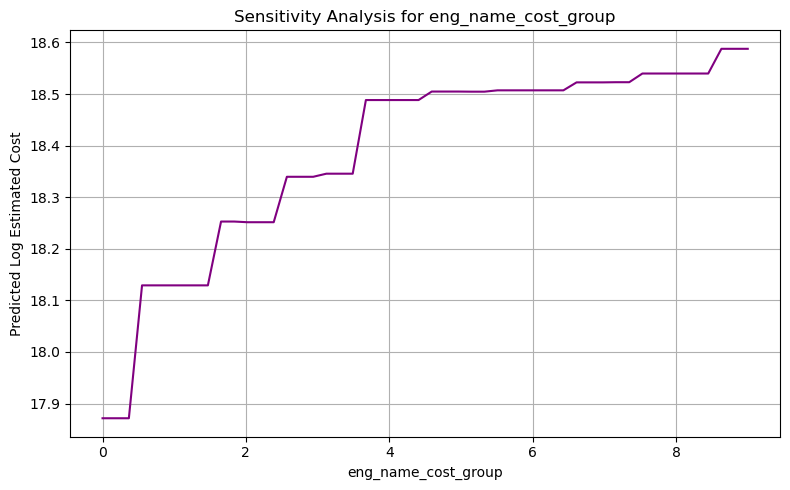

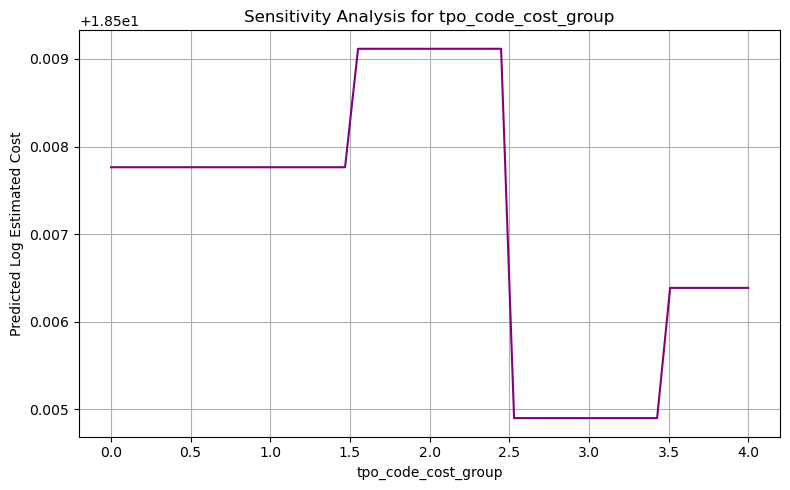

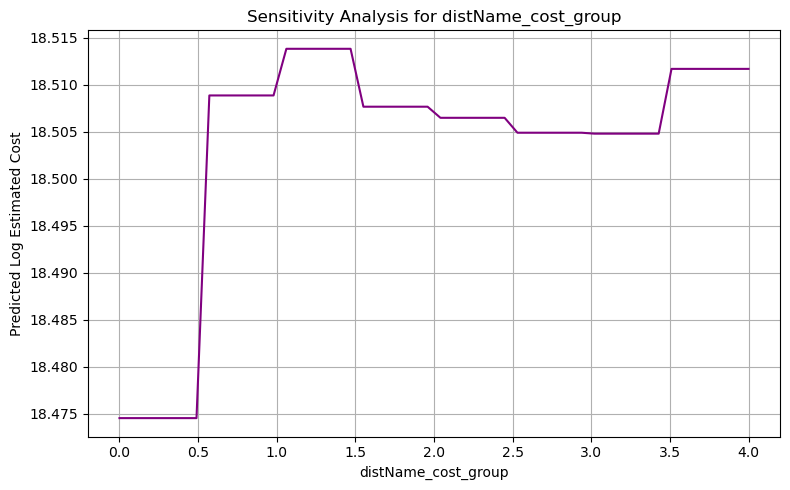

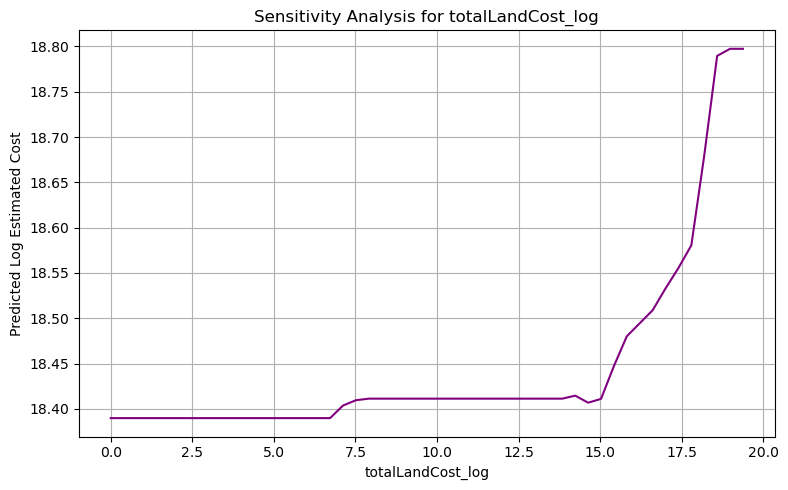

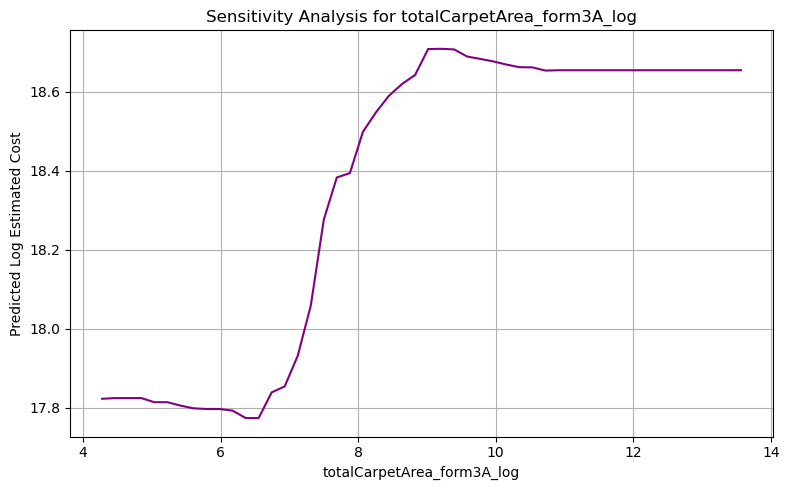

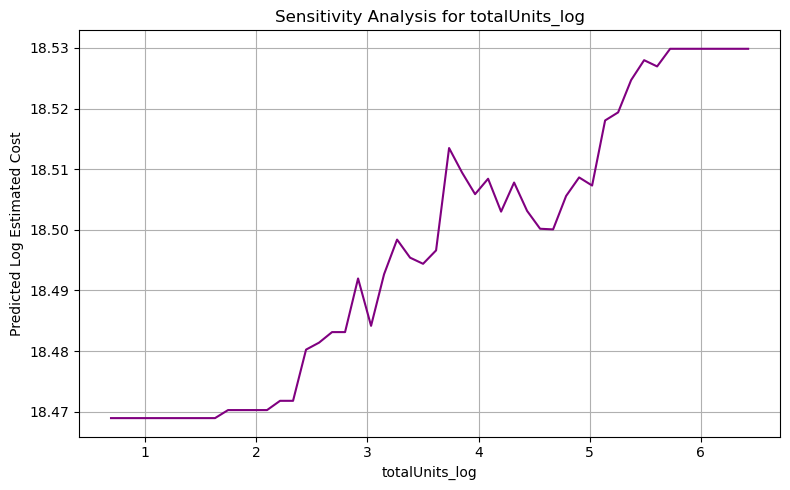

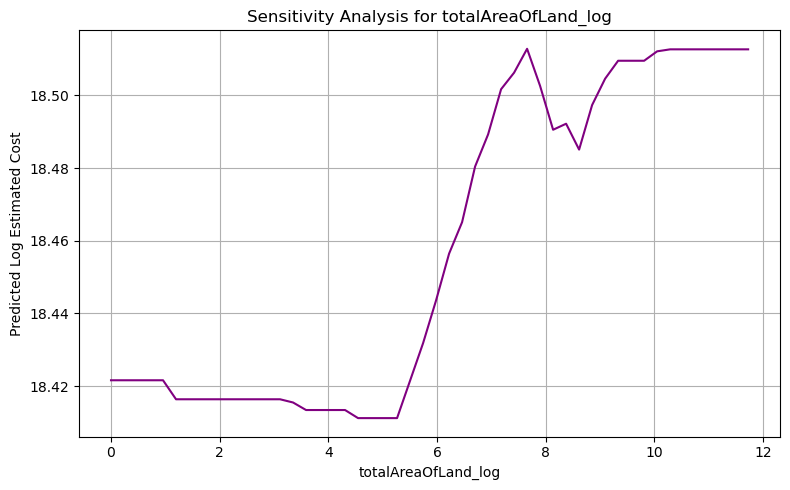

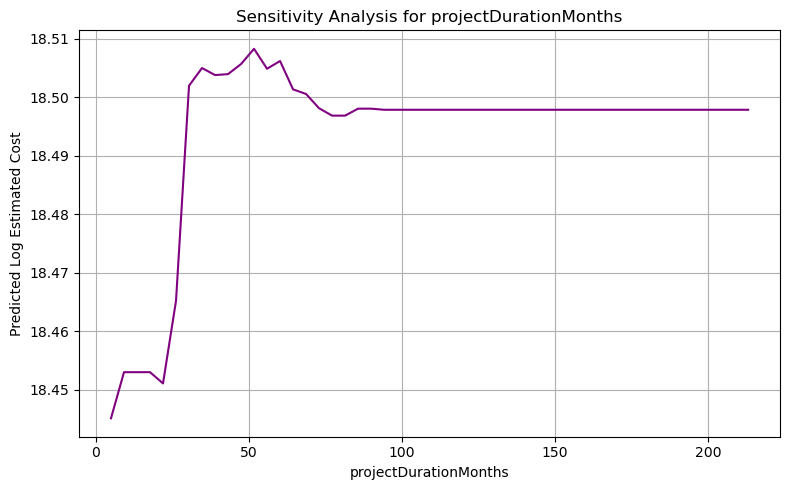

promoterName_cost_group      1.9777
totalCarpetArea_form3A_log   0.9342
eng_name_cost_group          0.7162
architect_name_cost_group    0.4168
totalLandCost_log            0.4075
totalAreaOfLand_log          0.1017
projectDurationMonths        0.0631
totalUnits_log               0.0609
distName_cost_group          0.0393
EndProjectYear               0.0381
EndProjectMonth              0.0238
projectType                  0.0080
underRedevelopment           0.0055
tpo_code_cost_group          0.0042
promoterType                 0.0042
dtype: float64


In [114]:
# Getting Top 10 features from the feature importance graph
feature_names = X.columns
top_indices = np.argsort(importances)#[-10:]
top_features = feature_names[top_indices]

# Sensitivity Plot Function
def plot_sensitivity(model, X, feature, num_points=50):
    X_copy = X.copy()
    feature_range = np.linspace(X_copy[feature].min(), X_copy[feature].max(), num_points)

    # Create dataframe with all values fixed at median
    baseline = pd.DataFrame([X_copy.median()] * num_points)
    baseline[feature] = feature_range

    preds = model.predict(baseline)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(feature_range, preds, label=f'Predicted cost vs {feature}', color='purple')
    plt.xlabel(feature)
    plt.ylabel('Predicted Log Estimated Cost')
    plt.title(f'Sensitivity Analysis for {feature}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Return numeric impact (range of prediction over the feature range)
    return preds.max() - preds.min()

# Run for Top Features
impacts = {}
for feature in top_features:
    impact_val = plot_sensitivity(rf_tune, X, feature)
    impacts[feature] = impact_val

# --- Print impacts as a sorted Series ---
impacts_series = pd.Series(impacts).sort_values(ascending=False)
print(impacts_series)

## SHAP Analysis

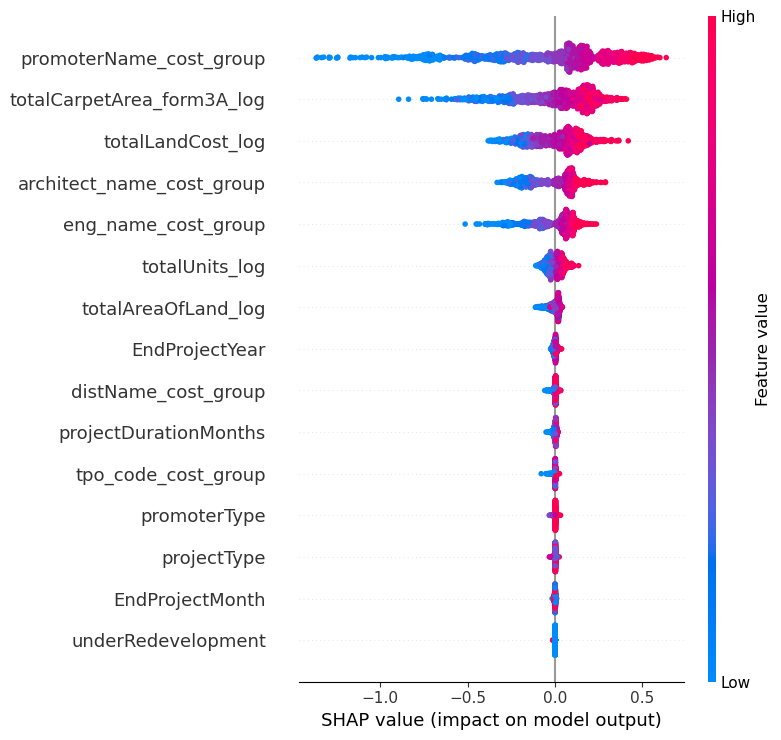

In [116]:
# Model Fit
model = rf_tune.fit(X_train, y_train)
# Create SHAP explainer
explainer = shap.TreeExplainer(model)  # TreeExplainer for tree-based models
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
# Summary plot (global view)
shap.summary_plot(shap_values, X_test)

In [117]:
shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mean |SHAP|': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean |SHAP|', ascending=False)
print(shap_importance)

                       Feature  Mean |SHAP|
5      promoterName_cost_group       0.3018
11  totalCarpetArea_form3A_log       0.1831
10           totalLandCost_log       0.1229
6    architect_name_cost_group       0.1171
7          eng_name_cost_group       0.1042
12              totalUnits_log       0.0344
13         totalAreaOfLand_log       0.0208
3               EndProjectYear       0.0064
9          distName_cost_group       0.0061
14       projectDurationMonths       0.0056
8          tpo_code_cost_group       0.0041
1                 promoterType       0.0033
0                  projectType       0.0031
4              EndProjectMonth       0.0018
2           underRedevelopment       0.0005


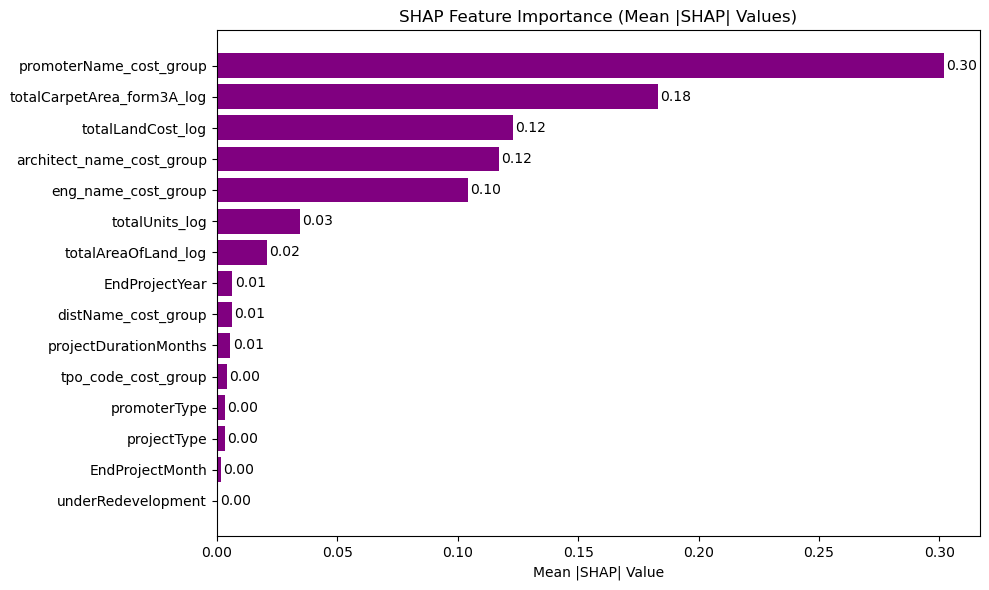

In [118]:
# Create SHAP importance dataframe
shap_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mean |SHAP|': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean |SHAP|', ascending=True)  # ascending=True for horizontal barh

# Plot
plt.figure(figsize=(10, 6))
ax = plt.barh(shap_importance['Feature'], shap_importance['Mean |SHAP|'], color="purple")

# Add values on bars
for i, v in enumerate(shap_importance['Mean |SHAP|']):
    plt.text(v + 0.001, i, f"{v:.2f}", va='center')

plt.title("SHAP Feature Importance (Mean |SHAP| Values)")
plt.xlabel("Mean |SHAP| Value")
plt.tight_layout()
plt.show()
